In [1]:
# %pip install yfinance
# %pip install nbformat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf

In [3]:
# connecting to my Google Drive

# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
#setting my working directory where files are
# %cd /content/drive/MyDrive/Data Visualization/IOC Data


In [5]:
df_stock = yf.download('^N225', start='1996-01-01', end='2025-01-01', progress=False)


YF.download() has changed argument auto_adjust default to True


In [6]:
df_stock.columns

MultiIndex([( 'Close', '^N225'),
            (  'High', '^N225'),
            (   'Low', '^N225'),
            (  'Open', '^N225'),
            ('Volume', '^N225')],
           names=['Price', 'Ticker'])

In [7]:
nikkei_etf = yf.Ticker('1329.T')

# Get historical market data
historical_data = nikkei_etf.history(period='25y')

Candlesitck Charts
https://plotly.com/python/candlestick-charts/


In [8]:
fig = go.Figure(data=[go.Candlestick(x=historical_data.index,
                open=historical_data['Open'],
                high=historical_data['High'],
                low=historical_data['Low'],
                close=historical_data['Close'])])

fig.show() # Runs on colab

In [9]:
# Function to plot stock data before, during, and after an event for any country
def plot_event_data_with_candlestick(country_ticker, bid_announce_date, event_start, event_end, country_name, event_name, index_name, currency='JPY'):
    # Fetch yahoo finance historical data
    nikkei_etf = yf.Ticker(country_ticker)
    historical_data = nikkei_etf.history(period='25y')

    # Convert/Clean data
    historical_data[['Open', 'High', 'Low', 'Close']] = historical_data[['Open', 'High', 'Low', 'Close']].astype(float)
    historical_data.index = historical_data.index.tz_localize(None)
    bid_announce_date = bid_announce_date.tz_localize(None)
    event_start = event_start.tz_localize(None)
    event_end = event_end.tz_localize(None)

    # Time Windows for Before, During, and After the Event:
    # Before the event
    before_event_start = bid_announce_date - pd.Timedelta(days=30)
    before_event_end = bid_announce_date + pd.Timedelta(days=30)

    # During the event
    during_event_start = event_start - pd.Timedelta(days=30)
    during_event_end = event_end + pd.Timedelta(days=14)

    # After the event
    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=30)

    # Separate data for before the event and after the event
    before_event_data = historical_data.loc[before_event_start:before_event_end]
    during_event_data = historical_data.loc[during_event_start:during_event_end]
    after_event_data = historical_data.loc[after_event_start:after_event_end]

    # Function to create and show a candlestick chart
    def plot_candlestick(data, title, vlines=None, annotations=None):
        fig = go.Figure(data=[go.Candlestick(
            x=data.index,
            open=data['Open'],
            high=data['High'],
            low=data['Low'],
            close=data['Close']
        )])

        # Add annotation lines
        if vlines:
            for vline in vlines:
                fig.add_vline(x=vline['x'], line=dict(color=vline['color'], dash=vline['dash'], width=vline['width']))

        # Add annotations
        if annotations:
            for annotation in annotations:
                fig.add_annotation(
                    x=annotation['x'],
                    y=annotation['y'],
                    text=annotation['text'],
                    showarrow=False,
                    font=dict(color=annotation['color'])
                )

        y_min = data['Close'].min() * 0.98  # 2% below the minimum closing price
        y_max = data['Close'].max() * 1.02  # 2% above the maximum closing price

        fig.update_layout(
            title=title,
            xaxis_title='Date',
            yaxis_title=f'Price ({currency})',
            xaxis_rangeslider_visible=False,
            yaxis=dict(range=[y_min, y_max])
        )

        fig.show()

    # Plot for the period before the event (Before Event Start to Before Event End)
    vlines_before = [{'x': bid_announce_date, 'color': 'black', 'dash': 'dash', 'width': 2}]
    annotations_before = [{'x': bid_announce_date, 'y': before_event_data['Close'].max() * 1.01,
                           'text': 'Bid Announcement', 'color': 'black'}]
    plot_candlestick(before_event_data, f'{country_name} ({index_name}) Before & After {event_name} Bid Announcement',
                     vlines=vlines_before, annotations=annotations_before)

    # Plot for the period during the event (During Event Start to After Event End)
    vlines_during = [
        {'x': event_start, 'color': 'black', 'dash': 'dash', 'width': 2},
        {'x': event_end, 'color': 'black', 'dash': 'dash', 'width': 2}
    ]
    annotations_during = [
        {'x': event_start, 'y': during_event_data['Close'].max() * 1.01, 'text': 'Event Start', 'color': 'black'},
        {'x': event_end, 'y': during_event_data['Close'].max() * 1.01, 'text': 'Event End', 'color': 'black'}
    ]
    plot_candlestick(pd.concat([during_event_data, after_event_data]), f'{country_name} ({index_name}) Before, During, and After {event_name}',
                     vlines=vlines_during, annotations=annotations_during)

# Japan:
plot_event_data_with_candlestick('1329.T', pd.to_datetime('2013-09-07'), pd.to_datetime('2021-07-24'), pd.to_datetime('2021-08-08'),
                                 country_name='Japan', event_name='Olympics', index_name='Nikkei 225', currency='JPY')


In [10]:
# London Olympics
plot_event_data_with_candlestick('^FTSE',
                                  pd.to_datetime('2005-07-06'),
                                  pd.to_datetime('2012-07-27'),
                                  pd.to_datetime('2012-08-12'),
                                  country_name='UK',
                                  event_name='London Olympics',
                                  index_name='FTSE 100',
                                  currency='GBP')


In [11]:
# Brazil Olympics
plot_event_data_with_candlestick('^BVSP',
                                  pd.to_datetime('2009-10-02'),
                                  pd.to_datetime('2016-08-05'),
                                  pd.to_datetime('2016-08-21'),
                                  country_name='Brazil',
                                  event_name='Olympics',
                                  index_name='Ibovespa',
                                  currency='BRL')

In [12]:
# Brazil (FIFA World Cup 2014)
plot_event_data_with_candlestick('^BVSP',
                                  pd.to_datetime('2007-10-30'),
                                  pd.to_datetime('2014-06-12'),
                                  pd.to_datetime('2014-07-13'),
                                  country_name='Brazil',
                                  event_name='FIFA World Cup',
                                  index_name='Ibovespa',
                                  currency='BRL')

In [13]:
# Paris Olympics
plot_event_data_with_candlestick('^FCHI',
                                  pd.to_datetime('2017-09-13'),
                                  pd.to_datetime('2024-07-26'),
                                  pd.to_datetime('2024-08-11'),
                                  country_name='France',
                                  event_name='Paris Olympics',
                                  index_name='CAC 40',
                                  currency='EUR')

In [14]:
plot_event_data_with_candlestick('^GDAXI',
                                  pd.to_datetime('2015-11-29'),  # Date of Hamburg referendum
                                  pd.to_datetime('2015-11-29'),
                                  pd.to_datetime('2015-11-29'),
                                  country_name='Germany',
                                  event_name='Olympic Bid Withdrawal',
                                  index_name='DAX 30',
                                  currency='EUR')

In [15]:
plot_event_data_with_candlestick('FTSEMIB.MI',
                                  pd.to_datetime('2016-10-11'),  # Rome withdrawal due to fiscal difficulties
                                  pd.to_datetime('2016-09-21'),
                                  pd.to_datetime('2016-09-21'),
                                  country_name='Italy',
                                  event_name='Olympic Bid Withdrawal',
                                  index_name='FTSE MIB',
                                  currency='EUR')

In [16]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to plot stock data before, during, and after an event for any country
def plot_event_data_with_candlestick(country_ticker, bid_announce_date, event_start, event_end, country_name, event_name, index_name):
    # Fetch historical data for the Nikkei 225 ETF (1329.T)
    nikkei_etf = yf.Ticker(country_ticker)
    historical_data = nikkei_etf.history(period='25y')

    # Ensure the data columns are float
    historical_data[['Open', 'High', 'Low', 'Close']] = historical_data[['Open', 'High', 'Low', 'Close']].astype(float)

    # Convert datetime index to naive (remove timezone info)
    historical_data.index = historical_data.index.tz_localize(None)

    # Convert event dates to naive datetime (remove timezone info)
    bid_announce_date = bid_announce_date.tz_localize(None)
    event_start = event_start.tz_localize(None)
    event_end = event_end.tz_localize(None)

    # Time Windows for Before, During, and After the Event:
    # Before the event (Day -7 to Day +14)
    before_event_start = bid_announce_date - pd.Timedelta(days=7)
    before_event_end = bid_announce_date + pd.Timedelta(days=14)

    # During the event (Day -7 to Closing day)
    during_event_start = event_start - pd.Timedelta(days=7)
    during_event_end = event_end + pd.Timedelta(days=7)

    # After the event (Day +1 to Day +21)
    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=21)

    # Filter data for the before, during, and after periods
    before_event_data = historical_data.loc[before_event_start:before_event_end]
    during_event_data = historical_data.loc[during_event_start:during_event_end]
    after_event_data = historical_data.loc[after_event_start:after_event_end]

    # Function to create and show a candlestick chart
    def plot_candlestick(data, title):
        fig = go.Figure(data=[go.Candlestick(
            x=data.index,
            open=data['Open'],
            high=data['High'],
            low=data['Low'],
            close=data['Close']
        )])

        fig.update_layout(
            title=title,
            xaxis_title='Date',
            yaxis_title='Price (JPY)',
            xaxis_rangeslider_visible=False  # Optional: Hide the range slider
        )

        fig.show()

    # Candlestick chart for before the event
    plot_candlestick(before_event_data, f'{country_name} ({index_name}) Before {event_name}')

    # Candlestick chart for during the event
    plot_candlestick(during_event_data, f'{country_name} ({index_name}) During {event_name}')

    # Candlestick chart for after the event
    plot_candlestick(after_event_data, f'{country_name} ({index_name}) After {event_name}')


# Example usage:
plot_event_data_with_candlestick('1329.T', pd.to_datetime('2013-09-07'), pd.to_datetime('2021-07-24'), pd.to_datetime('2021-08-08'),
                                 country_name='Japan', event_name='Olympics', index_name='Nikkei 225')


In [17]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to plot stock data before, during, and after an event for any country
def plot_event_data_with_candlestick(country_ticker, bid_announce_date, event_start, event_end, country_name, event_name, index_name):
    # Fetch historical data for the Nikkei 225 ETF (1329.T)
    nikkei_etf = yf.Ticker(country_ticker)
    historical_data = nikkei_etf.history(period='25y')

    # Ensure the data columns are float
    historical_data[['Open', 'High', 'Low', 'Close']] = historical_data[['Open', 'High', 'Low', 'Close']].astype(float)

    # Convert datetime index to naive (remove timezone info)
    historical_data.index = historical_data.index.tz_localize(None)

    # Convert event dates to naive datetime (remove timezone info)
    bid_announce_date = bid_announce_date.tz_localize(None)
    event_start = event_start.tz_localize(None)
    event_end = event_end.tz_localize(None)

    # Time Windows for Before, During, and After the Event:
    # Before the event (Day -7 to Day +14)
    before_event_start = bid_announce_date - pd.Timedelta(days=7)
    before_event_end = bid_announce_date + pd.Timedelta(days=14)

    # During the event (Day -7 to Closing day)
    during_event_start = event_start - pd.Timedelta(days=7)
    during_event_end = event_end + pd.Timedelta(days=7)

    # After the event (Day +1 to Day +21)
    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=21)

    # Filter data for the before, during, and after periods
    before_event_data = historical_data.loc[before_event_start:before_event_end]
    during_event_data = historical_data.loc[during_event_start:during_event_end]
    after_event_data = historical_data.loc[after_event_start:after_event_end]

    # Function to create and show a candlestick chart
    def plot_candlestick(data, title, vlines=None, annotations=None):
        fig = go.Figure(data=[go.Candlestick(
            x=data.index,
            open=data['Open'],
            high=data['High'],
            low=data['Low'],
            close=data['Close']
        )])

        # Add vertical lines (if any)
        if vlines:
            for vline in vlines:
                fig.add_vline(x=vline['x'], line=dict(color=vline['color'], dash=vline['dash'], width=vline['width']))

        # Add annotations (if any)
        if annotations:
            for annotation in annotations:
                fig.add_annotation(
                    x=annotation['x'],
                    y=annotation['y'],
                    text=annotation['text'],
                    arrowhead=2,
                    ax=0,
                    ay=-40
                )

        fig.update_layout(
            title=title,
            xaxis_title='Date',
            yaxis_title='Price (JPY)',
            xaxis_rangeslider_visible=False  # Optional: Hide the range slider
        )

        fig.show()

    # Vertical line and annotation for bid announcement (First Plot)
    vlines_before = [{'x': bid_announce_date, 'color': 'red', 'dash': 'dash', 'width': 2}]
    annotations_before = [{'x': bid_announce_date, 'y': before_event_data['Close'].max(),
                           'text': 'Bid Announcement', 'color': 'red'}]
    plot_candlestick(before_event_data, f'{country_name} ({index_name}) Before {event_name}',
                     vlines=vlines_before, annotations=annotations_before)

    # Vertical lines and annotations for event start and event end (Second Plot)
    vlines_during = [
        {'x': event_start, 'color': 'black', 'dash': 'dash', 'width': 2},
        {'x': event_end, 'color': 'black', 'dash': 'dash', 'width': 2}
    ]
    annotations_during = [
        {'x': event_start, 'y': during_event_data['Close'].max() * 0.9, 'text': 'Event Start', 'color': 'black'},
        {'x': event_end, 'y': during_event_data['Close'].max() * 0.9, 'text': 'Event End', 'color': 'black'}
    ]
    plot_candlestick(during_event_data, f'{country_name} ({index_name}) During {event_name}',
                     vlines=vlines_during, annotations=annotations_during)

    # Candlestick chart for after the event
    plot_candlestick(after_event_data, f'{country_name} ({index_name}) After {event_name}')

# Example usage:
plot_event_data_with_candlestick('1329.T', pd.to_datetime('2013-09-07'), pd.to_datetime('2021-07-24'), pd.to_datetime('2021-08-08'),
                                 country_name='Japan', event_name='Olympics', index_name='Nikkei 225')


Medal Count and Budget/Spending

In [18]:
# Load medal data for each olympic games
df_medals_lon = pd.read_csv('2012_London Olympics Nations Medals.csv')
df_medals_lon['Event'] = 'London Olympics'
df_medals_lon['Year'] =  pd.to_datetime('2012-01-01')

df_medals_paris = pd.read_csv('2024_Paris Olympics_Nations Medals.csv')
df_medals_paris['Event'] = 'Paris Olympics'
df_medals_paris['Year'] =  pd.to_datetime('2024-01-01')

df_medals_tokyo = pd.read_csv('2020_Tokyo Olympics Nations Medals.csv')
df_medals_tokyo['Event'] = 'Tokyo Olympics'
df_medals_tokyo['Year'] =  pd.to_datetime('2021-01-01')

df_medals_rio = pd.read_csv('2016_Rio Olympics Nations Medals.csv')
df_medals_rio['Event'] = 'Rio Olympics'
df_medals_rio['Year'] =  pd.to_datetime('2016-01-01')


df_medals_beijing = pd.read_csv('2008_Beijing Olympics_Nations_Medals.csv')
df_medals_beijing['Event'] = 'Beijing Olympics'
df_medals_beijing['Year'] =  pd.to_datetime('2008-01-01')

# Concat each olympics into one dataframe
df_medals = pd.concat([df_medals_lon, df_medals_paris, df_medals_tokyo,df_medals_rio, df_medals_beijing])
df_medals = df_medals.melt(id_vars=['NOC', 'Event', 'Year'], value_vars=['Gold', 'Silver', 'Bronze'],
                 var_name='Medal Type', value_name='Medal')

df_medals.head()

NOC            Event       Year Medal Type  Medal
0  USA  London Olympics 2012-01-01       Gold     48
1  CHN  London Olympics 2012-01-01       Gold     39
2  GBR  London Olympics 2012-01-01       Gold     29
3  RUS  London Olympics 2012-01-01       Gold     18
4  KOR  London Olympics 2012-01-01       Gold     13

In [19]:
df_medals.NOC.unique()

array(['USA', 'CHN', 'GBR', 'RUS', 'KOR', 'GER', 'FRA', 'AUS', 'ITA',
       'HUN', 'JPN', 'IRI', 'NED', 'NZL', 'UKR', 'CUB', 'ESP', 'JAM',
       'CZE', 'RSA', 'PRK', 'BRA', 'KAZ', 'POL', 'ETH', 'CRO', 'CAN',
       'BLR', 'KEN', 'DEN', 'ROU', 'AZE', 'SUI', 'NOR', 'LTU', 'TUN',
       'SWE', 'COL', 'MEX', 'GEO', 'IRL', 'ARG', 'SLO', 'TTO', 'SRB',
       'TUR', 'DOM', 'TPE', 'LAT', 'BAH', 'ALG', 'GRN', 'VEN', 'BRN',
       'UGA', 'EGY', 'IND', 'MGL', 'THA', 'INA', 'BUL', 'FIN', 'SVK',
       'BEL', 'MAS', 'QAT', 'ARM', 'EST', 'PUR', 'GUA', 'CYP', 'BOT',
       'POR', 'MNE', 'GAB', 'UZB', 'SIN', 'GRE', 'VIE', 'MAR', 'TJK',
       'KUW', 'HKG', 'CMR', 'KSA', 'AFG', 'AUT', 'PHI', 'ISR', 'AIN',
       'ECU', 'LCA', 'CHI', 'PAK', 'DMA', 'KGZ', 'MDA', 'KOS', 'PAN',
       'JOR', 'FIJ', 'ALB', 'CPV', 'ZAM', 'CIV', 'ROT', 'PER', 'ROC',
       'BER', 'SMR', 'NGR', 'MKD', 'NAM', 'TKM', 'BUR', 'SYR', 'GHA',
       'IOA', 'NIG', 'BDI', 'UAE', 'ISL', 'MRI', 'SAM', 'SGP', 'SUD',
       'TOG', 'ZIM']

In [20]:
# Load the spending data
df_spending = pd.read_excel('CountrySpending.xlsx')
df_spending['Year'] =  pd.to_datetime(df_spending['Year'], format = '%Y')
df_spending.head()

Year  Budget Spending Country  NOC
0 2008-01-01           119.70   Japan  JPN
1 2009-01-01           141.95   Japan  JPN
2 2010-01-01           143.36   Japan  JPN
3 2011-01-01           143.58   Japan  JPN
4 2012-01-01           148.30   Japan  JPN

In [21]:
# Join Spending with medal Count data
df_merged = pd.merge(df_spending, df_medals, on=['NOC', 'Year'], how='outer')
df_merged.replace(np.nan, 0, inplace=True)
df_filtered = df_merged[df_merged['NOC'].isin(['JPN', 'FRA', 'GBR'])]

print(df_merged.describe())
print(df_merged.shape)
print(df_merged.head())
print(df_filtered.head())

                                Year  Budget Spending        Medal
count                           1349      1349.000000  1349.000000
mean   2016-04-27 16:03:54.840622592       223.815300     3.710897
min              2004-01-01 00:00:00         0.000000     0.000000
25%              2012-01-01 00:00:00         0.000000     0.000000
50%              2016-01-01 00:00:00         0.000000     1.000000
75%              2021-01-01 00:00:00         0.000000     4.000000
max              2024-01-01 00:00:00     15804.000000    48.000000
std                              NaN      1639.888938     6.507314
(1349, 7)
        Year  Budget Spending Country  NOC             Event Medal Type  Medal
0 2008-01-01              0.0       0  AFG  Beijing Olympics       Gold    0.0
1 2008-01-01              0.0       0  AFG  Beijing Olympics     Silver    0.0
2 2008-01-01              0.0       0  AFG  Beijing Olympics     Bronze    1.0
3 2012-01-01              0.0       0  AFG   London Olympics       Gold

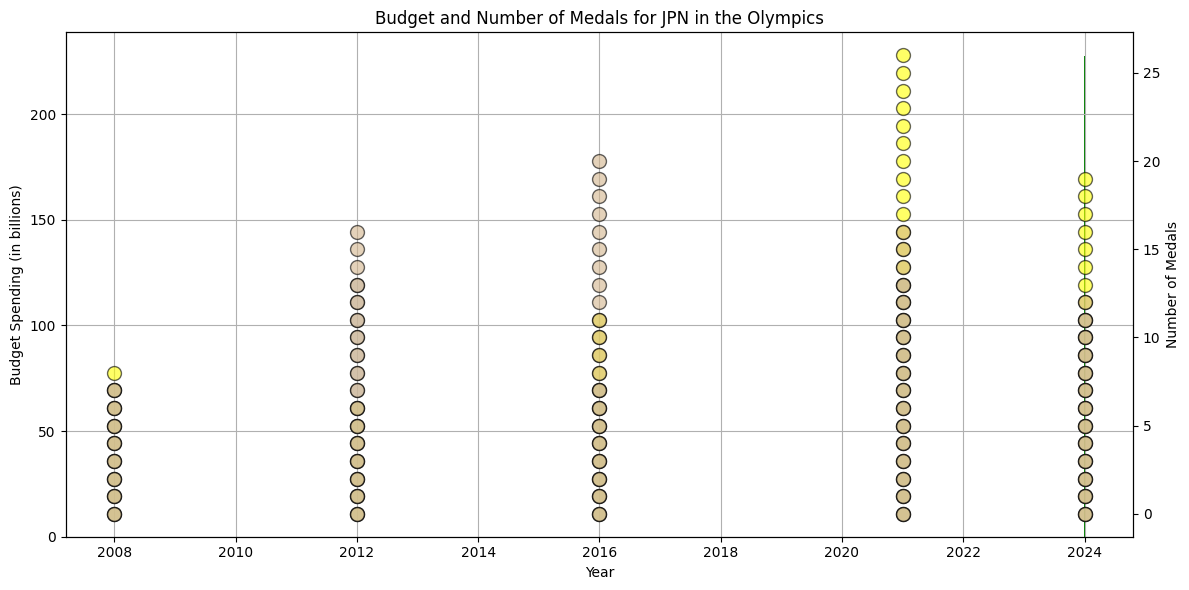

In [22]:

def plot_budget_and_medals_for_country(df_merged, country_noc):

    # Filter the data for the specified country using the NOC code
    df_country = df_merged[df_merged['NOC'] == country_noc]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the budget on the primary y-axis (ax1) as a bar plot
    ax1.bar(df_country['Year'], df_country['Budget Spending'], color='green', alpha=0.7, label="Budget Spending")
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Budget Spending (in billions)')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()

    # Plotting the number of medals as circles on ax2
    for _, row in df_country.iterrows():
        year = row['Year']
        medal_count = row['Medal']
        medal_type = row['Medal Type']

        if pd.notna(medal_count) and medal_count > 0:
            # Initialize y-position for stacking circles
            y_pos = 0

            # Loop over the number of medals and plot a circle for each
            for i in range(int(medal_count)):
                # Color based on medal type
                if medal_type == 'Gold':
                    color = 'yellow'
                elif medal_type == 'Silver':
                    color = 'silver'
                elif medal_type == 'Bronze':
                    color = 'tan'

                # Plot each circle on the y-axis
                ax2.scatter(year, y_pos, s=100, c=color, alpha=0.6, edgecolors='black', linewidth=1)
                y_pos += 1  # Stack the next circle

    ax2.set_ylabel('Number of Medals')
    ax2.tick_params(axis='y')
    ax1.set_title(f'Budget and Number of Medals for {country_noc} in the Olympics')
    ax1.grid(True)
    plt.tight_layout()
    plt.show()

# Japan
plot_budget_and_medals_for_country(df_merged, 'JPN')

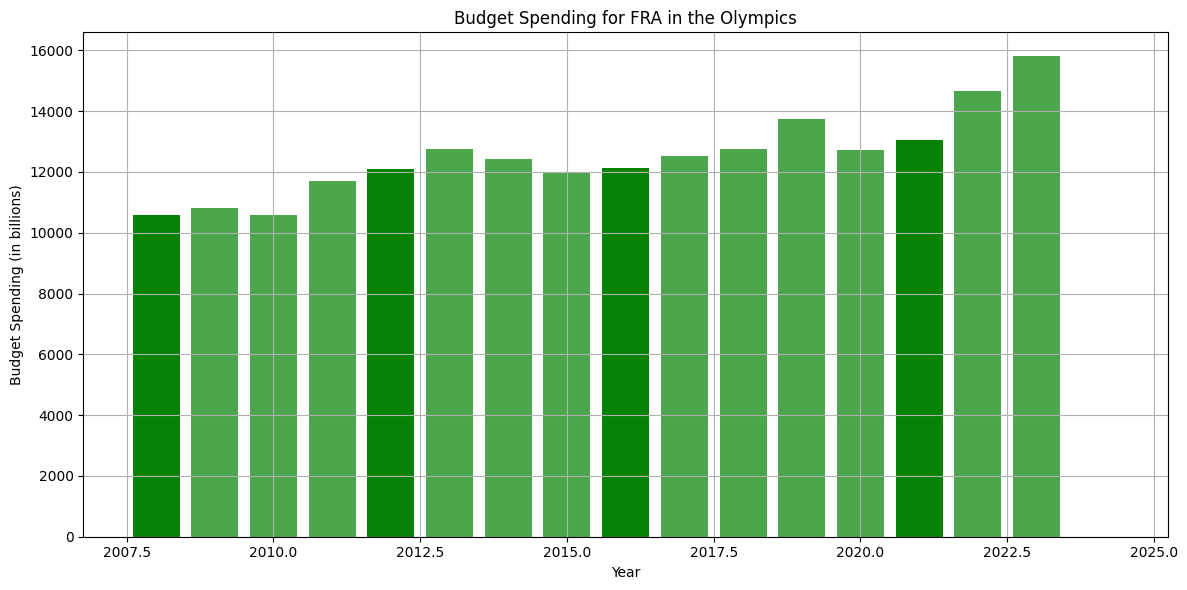

In [23]:
def plot_budget_for_country(df_merged, country_noc):

    # Filter the data for the specified country using the NOC code
    df_country = df_merged[df_merged['NOC'] == country_noc]
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the budget on the primary y-axis (ax1) as a bar plot
    ax1.bar(df_country['Year'].dt.year, df_country['Budget Spending'], color='green', alpha=0.7, label="Budget Spending")
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Budget Spending (in billions)')
    ax1.tick_params(axis='y')
    ax1.set_title(f'Budget Spending for {country_noc} in the Olympics')
    ax1.grid(True)
    plt.tight_layout()
    plt.show()


plot_budget_for_country(df_merged, 'FRA')

<ipython-input-24-0b507f06e6bd>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



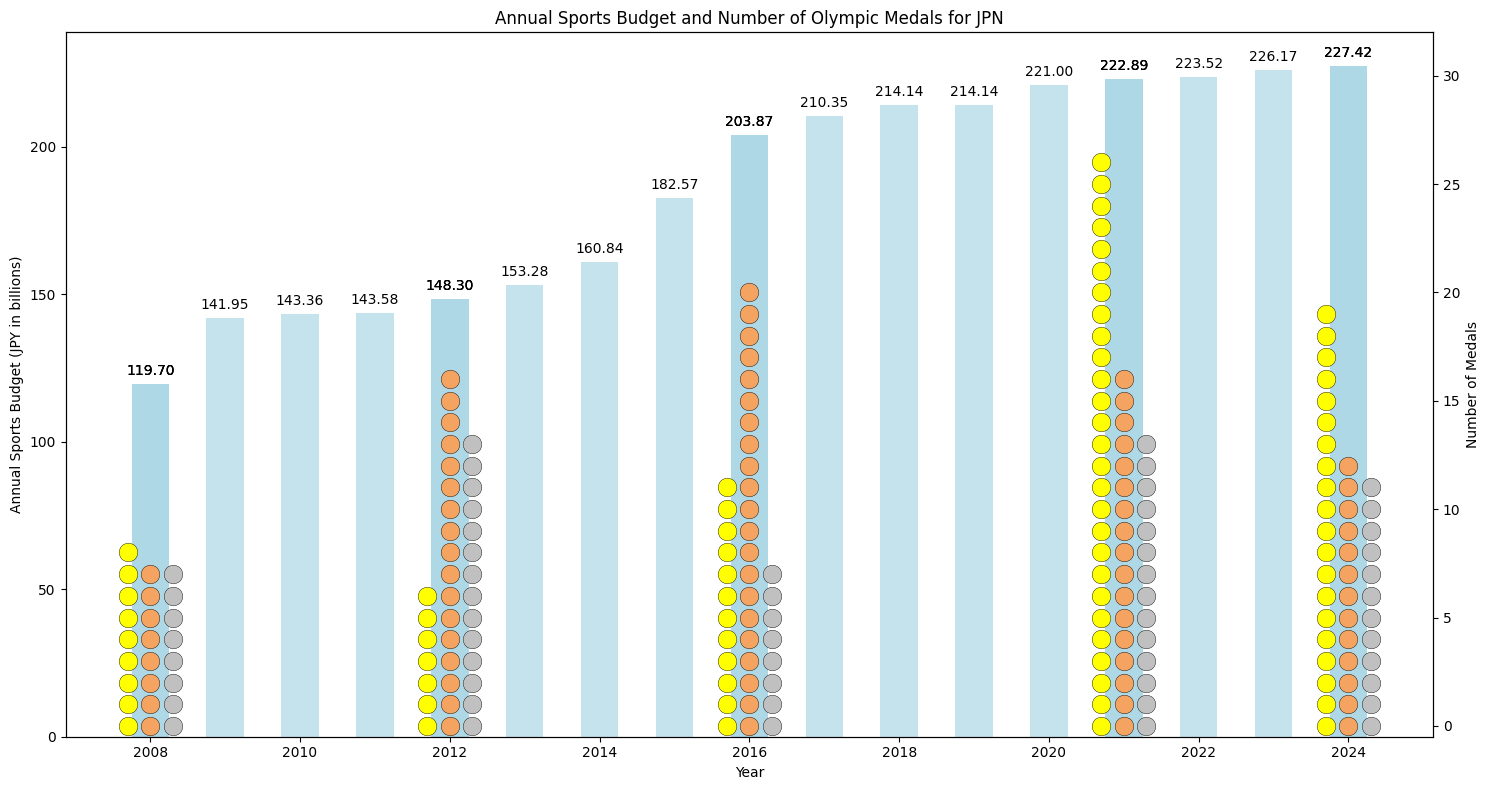

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for the specified country using the NOC code
country_noc = 'JPN'
df_country = df_merged[df_merged['NOC'] == country_noc]
df_country['Year'] = pd.to_datetime(df_country['Year']).dt.year

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting the budget
budget_bars = ax1.bar(df_country['Year'], df_country['Budget Spending'], color='lightblue', alpha=0.7, label="Budget Spending", width=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual Sports Budget (JPY in billions)')
ax1.tick_params(axis='y')
for bar in budget_bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

ax2 = ax1.twinx()

# map medal type to colors
medal_colors = {
    'Gold': 'yellow',
    'Silver': 'silver',
    'Bronze': 'sandybrown'
}
offset = 0.3

# Plotting the number of medals as circles on ax2
for _, row in df_country.iterrows():
    year = row['Year']
    medal_count = row['Medal']
    medal_type = row['Medal Type']

    if pd.notna(medal_count) and medal_count > 0:
        # set position on x axis for each medal type
        if medal_type == 'Gold':
            x_pos = -offset
        elif medal_type == 'Bronze':
            x_pos = 0
        elif medal_type == 'Silver':
            x_pos = offset

        # Loop over the number of medals and plot a circle for each
        for i in range(int(medal_count)):
            # Plot each circle on the y-axis
            ax2.scatter(year + x_pos, i, s=180, c=medal_colors[medal_type], alpha=1, edgecolors='black', linewidth=.3)

ax2.set_ylabel('Number of Medals')
ax2.set_ylim(-0.5, df_country['Medal'].max() + 5)
ax2.tick_params(axis='y')
ax1.set_xticks(df_country['Year'].unique())
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
ax1.set_title(f'Annual Sports Budget and Number of Olympic Medals for {country_noc}')
plt.tight_layout()
plt.show()


<ipython-input-25-09a7488d54cb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



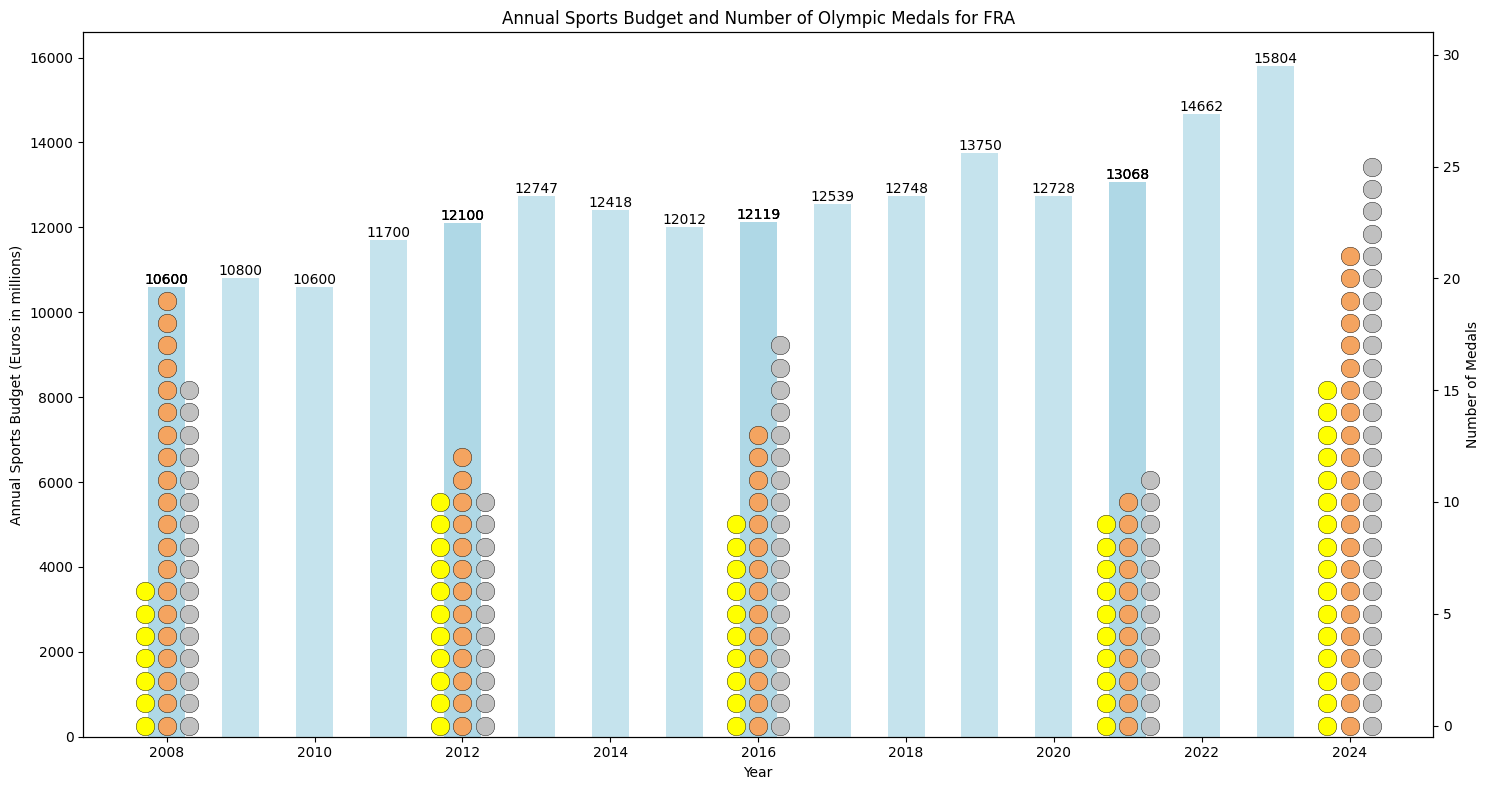

In [25]:

# Filter the data for the specified country using the NOC code
country_noc = 'FRA'
df_country = df_merged[df_merged['NOC'] == country_noc]
df_country['Year'] = pd.to_datetime(df_country['Year']).dt.year

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting the budget on on ax1
budget_bars = ax1.bar(df_country['Year'], df_country['Budget Spending'], color='lightblue', alpha=0.7, label="Budget Spending", width=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual Sports Budget (Euros in millions)')
ax1.tick_params(axis='y')
for bar in budget_bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

ax2 = ax1.twinx()

# medal type : color
medal_colors = {
    'Gold': 'yellow',
    'Silver': 'silver',
    'Bronze': 'sandybrown'
}

offset = 0.3

# Plotting the number of medals as circles on ax2
for _, row in df_country.iterrows():
    year = row['Year']
    medal_count = row['Medal']
    medal_type = row['Medal Type']

    if pd.notna(medal_count) and medal_count > 0:
        # get x axis postition for each medal type
        if medal_type == 'Gold':
            x_pos = -offset
        elif medal_type == 'Bronze':
            x_pos = 0
        elif medal_type == 'Silver':
            x_pos = offset

        # Loop over the number of medals and plot a circle for each
        for i in range(int(medal_count)):
            # Plot each circle on the y-axis
            ax2.scatter(year + x_pos, i, s=180, c=medal_colors[medal_type], alpha=1, edgecolors='black', linewidth=.3)

ax2.set_ylabel('Number of Medals')
ax2.set_ylim(-0.5, df_country['Medal'].max() + 5)
ax2.tick_params(axis='y')
ax1.set_xticks(df_country['Year'].unique())
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
ax1.set_title(f'Annual Sports Budget and Number of Olympic Medals for {country_noc}')
plt.tight_layout()
plt.show()


<ipython-input-26-aee280b8e944>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



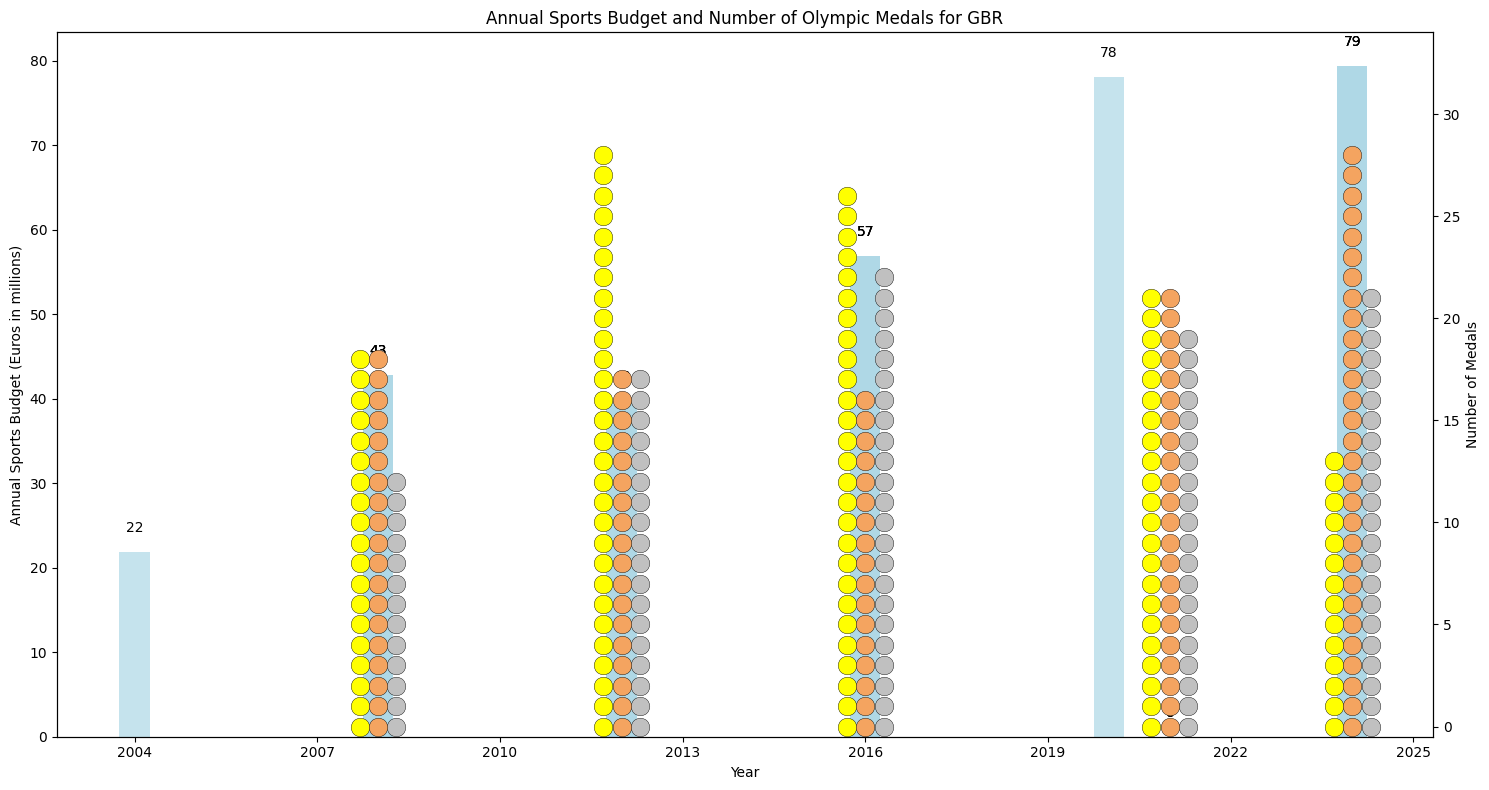

In [26]:

# Filter the data for the specified country using the NOC code
country_noc = 'GBR'
df_country = df_merged[df_merged['NOC'] == country_noc]
df_country['Year'] = pd.to_datetime(df_country['Year']).dt.year

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting the budget on on ax1
budget_bars = ax1.bar(df_country['Year'], df_country['Budget Spending'], color='lightblue', alpha=0.7, label="Budget Spending", width=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual Sports Budget (Euros in millions)')
ax1.tick_params(axis='y')
for bar in budget_bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

ax2 = ax1.twinx()

# medal type : color
medal_colors = {
    'Gold': 'yellow',
    'Silver': 'silver',
    'Bronze': 'sandybrown'
}

offset = 0.3

# Plotting the number of medals as circles on ax2
for _, row in df_country.iterrows():
    year = row['Year']
    medal_count = row['Medal']
    medal_type = row['Medal Type']

    if pd.notna(medal_count) and medal_count > 0:
        # get x axis postition for each medal type
        if medal_type == 'Gold':
            x_pos = -offset
        elif medal_type == 'Bronze':
            x_pos = 0
        elif medal_type == 'Silver':
            x_pos = offset

        # Loop over the number of medals and plot a circle for each
        for i in range(int(medal_count)):
            # Plot each circle on the y-axis
            ax2.scatter(year + x_pos, i, s=180, c=medal_colors[medal_type], alpha=1, edgecolors='black', linewidth=.3)

ax2.set_ylabel('Number of Medals')
ax2.set_ylim(-0.5, df_country['Medal'].max() + 5)
ax2.tick_params(axis='y')
ax1.set_xticks(df_country['Year'].unique())
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
ax1.set_title(f'Annual Sports Budget and Number of Olympic Medals for {country_noc}')
plt.tight_layout()
plt.show()


FTSE -- London
S&P/TSX -- Canada
IBOVESPA -- BRazil -- BVSP
DAX -- Germany
KOSPI -- Korea -- KS11
S&P/ASX 200 -- Australia

^FTSE: FTSE 100 Index (Financial Times Stock Exchange, UK)
^NSEI: Nifty 50 (National Stock Exchange of India)
^BSESN: BSE SENSEX (Bombay Stock Exchange, India)
^N225: Nikkei 225 (Japan)
000001.SS: SSE Composite Index (Shanghai Stock Exchange)
^N100: Euronext 100 (European Stock Exchange)

In [27]:
import yfinance as yf

In [28]:
nikkei = yf.Ticker('1329.T').funds_data
nikkei.description
nikkei.top_holdings

Name  Holding Percent
Symbol                                               
9983.T         Fast Retailing Co Ltd         0.108188
8035.T            Tokyo Electron Ltd         0.058493
6857.T                Advantest Corp         0.057218
9984.T           SoftBank Group Corp         0.043744
9433.T                     KDDI Corp         0.025877
6098.T       Recruit Holdings Co Ltd         0.023265
6762.T                      TDK Corp         0.020965
4519.T  Chugai Pharmaceutical Co Ltd         0.019794
4063.T     Shin-Etsu Chemical Co Ltd         0.019793
6954.T                    Fanuc Corp         0.018987

In [29]:
nikkei_etf = yf.Ticker('1329.T')

# Get historical market data
historical_data = nikkei_etf.history(period='25y')

print(historical_data.head())


                                   Open          High           Low  \
Date                                                                  
2008-01-04 00:00:00+09:00  12221.809570  12221.809570  12221.809570   
2008-01-07 00:00:00+09:00  12062.748047  12062.748047  12062.748047   
2008-01-08 00:00:00+09:00  12088.429688  12088.429688  12088.429688   
2008-01-09 00:00:00+09:00  12146.419922  12146.419922  12146.419922   
2008-01-10 00:00:00+09:00  11971.621094  11971.621094  11971.621094   

                                  Close  Volume  Dividends  Stock Splits  \
Date                                                                       
2008-01-04 00:00:00+09:00  12221.809570       0        0.0           0.0   
2008-01-07 00:00:00+09:00  12062.748047       0        0.0           0.0   
2008-01-08 00:00:00+09:00  12088.429688       0        0.0           0.0   
2008-01-09 00:00:00+09:00  12146.419922       0        0.0           0.0   
2008-01-10 00:00:00+09:00  11971.621094       

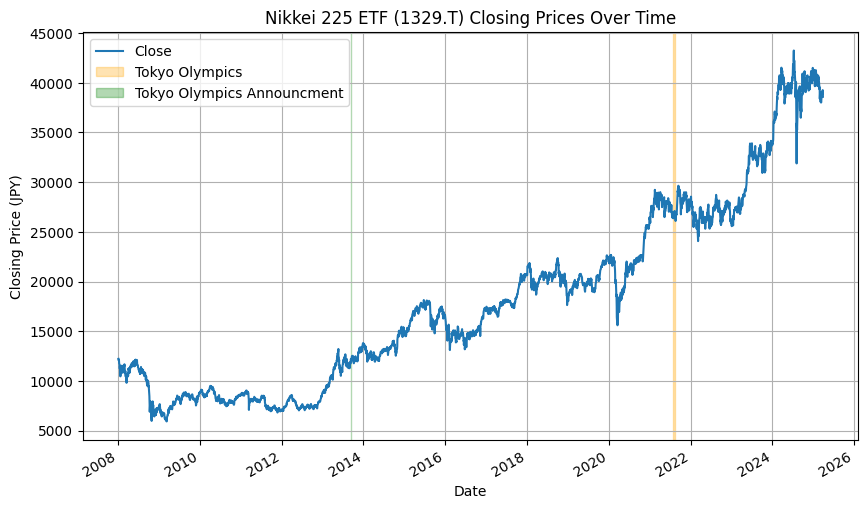

In [30]:
historical_data = nikkei_etf.history(period='25y')
historical_data['Close'].plot(figsize=(10, 6))
plt.title('Nikkei 225 ETF (1329.T) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (JPY)')
highlight_start = '2021-07-27'
highlight_end = '2021-08-13'
plt.axvspan(highlight_start, highlight_end, color='orange', alpha=0.3, label='Tokyo Olympics')
highlight_start1 = '2013-09-07'
highlight_end1 = '2013-09-07'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='Tokyo Olympics Announcment')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

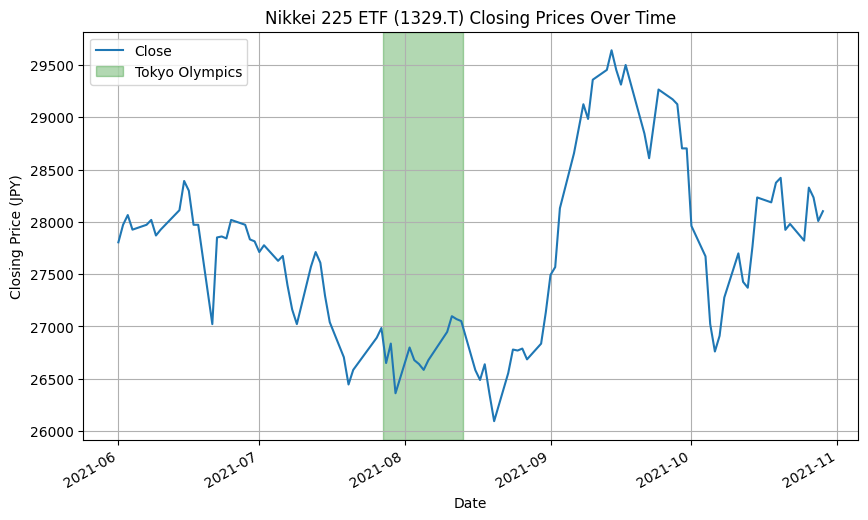

In [31]:
historical_data = nikkei_etf.history(period='5y')
filtered_data = historical_data.loc['2021-06-01':'2021-10-31']
filtered_data['Close'].plot(figsize=(10, 6))
plt.title('Nikkei 225 ETF (1329.T) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (JPY)')
highlight_start = '2021-07-27'
highlight_end = '2021-08-13'
plt.axvspan(highlight_start, highlight_end, color='green', alpha=0.3, label='Tokyo Olympics')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

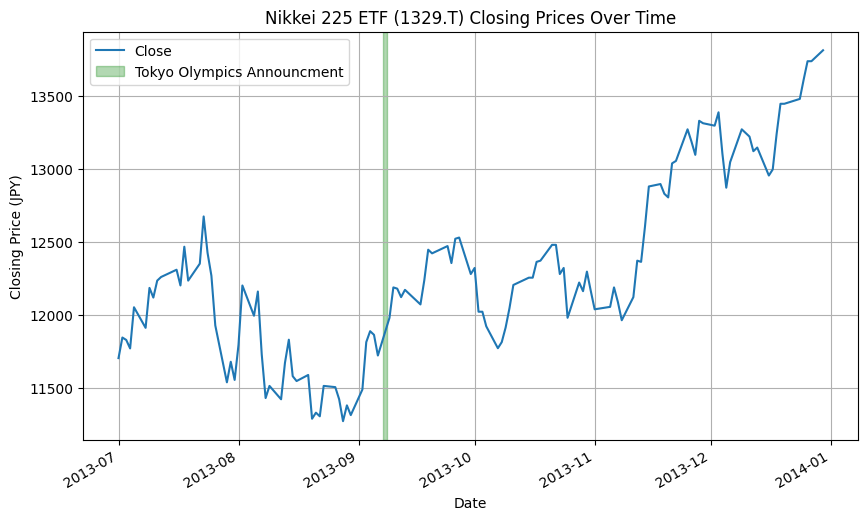

In [32]:
historical_data = nikkei_etf.history(period='25y')
filtered_data = historical_data.loc['2013-07-01':'2013-12-31']
filtered_data['Close'].plot(figsize=(10, 6))
plt.title('Nikkei 225 ETF (1329.T) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (JPY)')
highlight_start = '2013-09-07'
highlight_end = '2013-09-08'
plt.axvspan(highlight_start, highlight_end, color='green', alpha=0.3, label='Tokyo Olympics Announcment')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

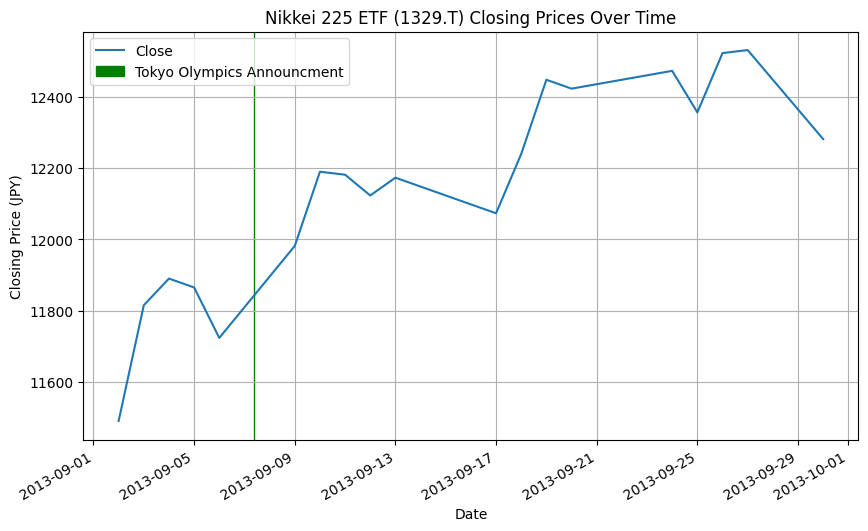

In [33]:
historical_data = nikkei_etf.history(period='25y')
filtered_data = historical_data.loc['2013-09-01':'2013-09-30']
filtered_data['Close'].plot(figsize=(10, 6))
plt.title('Nikkei 225 ETF (1329.T) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (JPY)')
highlight_start = '2013-09-07'
highlight_end = '2013-09-07'
plt.axvspan(highlight_start, highlight_end, color='green', alpha=1, label='Tokyo Olympics Announcment')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [34]:
brazil_etf = yf.Ticker('^BVSP')

# Get historical market data
historical_data = brazil_etf.history(period='25y')

print(historical_data[['Close']])


                              Close
Date                               
2000-03-28 00:00:00-03:00   18338.0
2000-03-29 00:00:00-03:00   18053.0
2000-03-30 00:00:00-03:00   17647.0
2000-03-31 00:00:00-03:00   17820.0
2000-04-03 00:00:00-03:00   17245.0
...                             ...
2025-03-24 00:00:00-03:00  131321.0
2025-03-25 00:00:00-03:00  132068.0
2025-03-26 00:00:00-03:00  132520.0
2025-03-27 00:00:00-03:00  133149.0
2025-03-28 00:00:00-03:00  131902.0

[6193 rows x 1 columns]


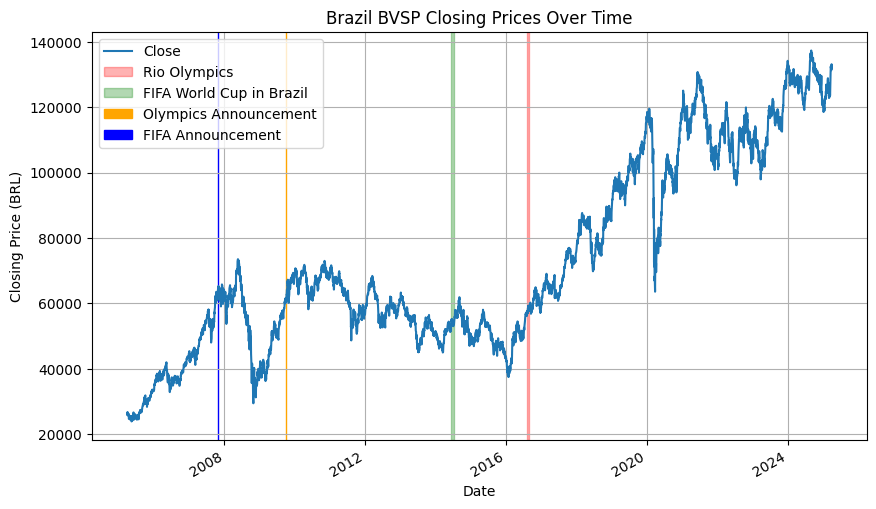

In [35]:
historical_data = brazil_etf.history(period='20y')
historical_data['Close'].plot(figsize=(10, 6))
plt.title('Brazil BVSP Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (BRL)')
highlight_start = '2016-08-05'
highlight_end = '2016-08-21'
plt.axvspan(highlight_start, highlight_end, color='red', alpha=0.3, label='Rio Olympics')
highlight_start1 = '2014-06-12'
highlight_end1 = '2014-07-13'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='FIFA World Cup in Brazil')
highlight_start2 = '2009-10-01'
highlight_end2 = '2009-10-02'
plt.axvspan(highlight_start2, highlight_end2, color='orange', alpha=1, label='Olympics Announcement')
highlight_start3 = '2007-10-29'
highlight_end3 = '2007-10-31'
plt.axvspan(highlight_start3, highlight_end3, color='blue', alpha=1, label='FIFA Announcement')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Keep in mind, host selection happen well in advance.

Brazil was selected in 2009 to host the 2016 Summer Olympics and in 2007 to host the 2014 World Cup finals.

The mid-2000s, when these selections were made, was a magical time for Brazil.
GDP growth in 2004 was at nearly 6%.

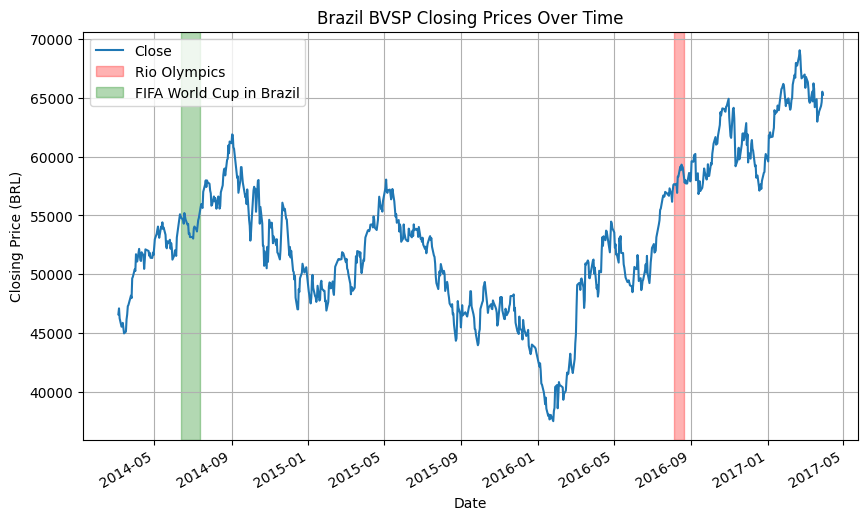

In [36]:
historical_data = brazil_etf.history(period='15y')
filtered_data = historical_data.loc['2014-03-01':'2017-03-30']
filtered_data['Close'].plot(figsize=(10, 6))
plt.title('Brazil BVSP Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (BRL)')
highlight_start = '2016-08-05'
highlight_end = '2016-08-21'
plt.axvspan(highlight_start, highlight_end, color='red', alpha=0.3, label='Rio Olympics')
highlight_start1 = '2014-06-12'
highlight_end1 = '2014-07-13'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='FIFA World Cup in Brazil')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

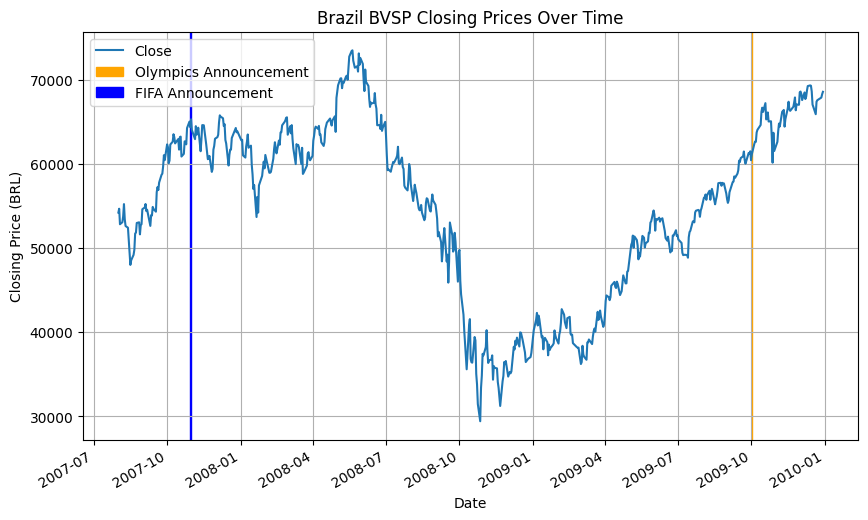

In [37]:
historical_data = brazil_etf.history(period='25y')
filtered_data = historical_data.loc['2007-08-01':'2009-12-31']
filtered_data['Close'].plot(figsize=(10, 6))
plt.title('Brazil BVSP Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (BRL)')
highlight_start2 = '2009-10-02'
highlight_end2 = '2009-10-02'
plt.axvspan(highlight_start2, highlight_end2, color='orange', alpha=1, label='Olympics Announcement')
highlight_start3 = '2007-10-30'
highlight_end3 = '2007-10-31'
plt.axvspan(highlight_start3, highlight_end3, color='blue', alpha=1, label='FIFA Announcement')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [38]:
dfUSMarkets = yf.Ticker('^GSPC')

# Get historical market data
historical_data = dfUSMarkets.history(period='18y')

print(historical_data[['Close']])



                                 Close
Date                                  
2007-03-29 00:00:00-04:00  1422.530029
2007-03-30 00:00:00-04:00  1420.859985
2007-04-02 00:00:00-04:00  1424.550049
2007-04-03 00:00:00-04:00  1437.770020
2007-04-04 00:00:00-04:00  1439.369995
...                                ...
2025-03-24 00:00:00-04:00  5767.569824
2025-03-25 00:00:00-04:00  5776.649902
2025-03-26 00:00:00-04:00  5712.200195
2025-03-27 00:00:00-04:00  5693.310059
2025-03-28 00:00:00-04:00  5580.939941

[4530 rows x 1 columns]


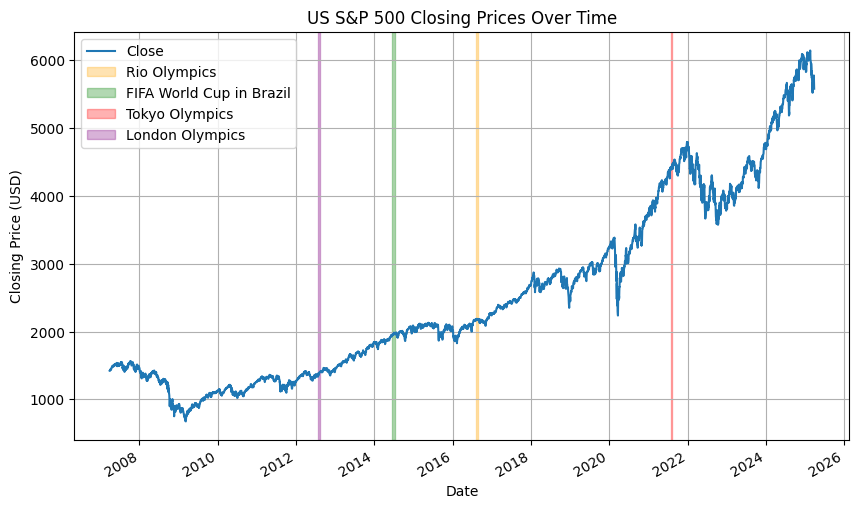

In [39]:
historical_data['Close'].plot(figsize=(10, 6))
plt.title('US S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
highlight_start = '2016-08-05'
highlight_end = '2016-08-21'
plt.axvspan(highlight_start, highlight_end, color='orange', alpha=0.3, label='Rio Olympics')
highlight_start1 = '2014-06-12'
highlight_end1 = '2014-07-13'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='FIFA World Cup in Brazil')
highlight_start2 = '2021-07-27'
highlight_end2 = '2021-08-13'
plt.axvspan(highlight_start2, highlight_end2, color='red', alpha=0.3, label='Tokyo Olympics')
highlight_start3 = '2012-07-27'
highlight_end3 = '2012-08-13'
plt.axvspan(highlight_start3, highlight_end3, color='purple', alpha=0.3, label='London Olympics')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Sales in Japan UK Brazil

In [40]:
dfJPSales = pd.read_excel('DatasetsCollected.xlsx', sheet_name='Japan Retail Sales')
dfJPSales.head()

Months       Date  Yearly % Change
0       1 2025-01-31              3.9
1      12 2024-12-31              3.5
2       9 2024-09-30              0.7
3       6 2024-06-28              3.8
4       3 2024-03-29              1.1

In [41]:
import matplotlib.dates as mdates


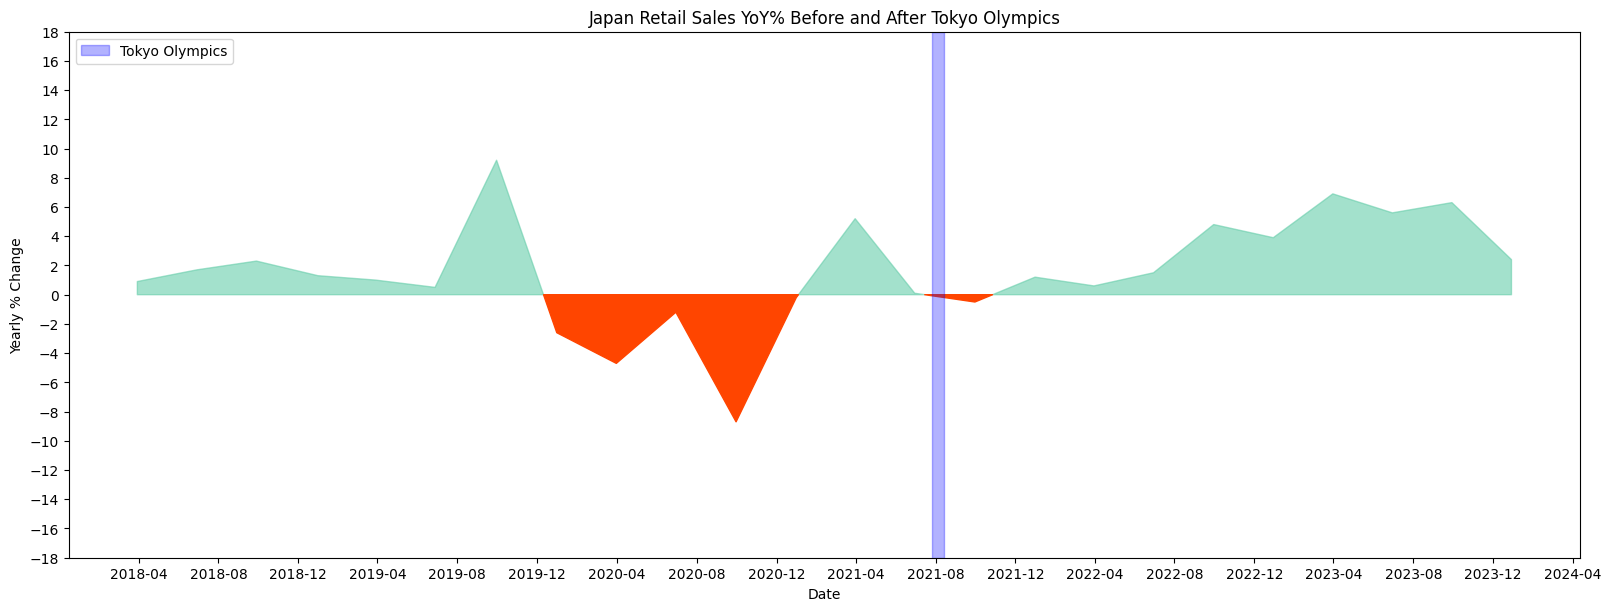

In [42]:
fig, ax = plt.subplots(figsize=(16, 6), layout='constrained')

# Sort and filter data
df_sorted = dfJPSales.sort_values('Date', ascending=True)
df_filtered = df_sorted[(df_sorted['Date'] >= '2018-01-01') & (df_sorted['Date'] <= '2024-01-01')]
xs = df_filtered['Date']
ys = df_filtered['Yearly % Change']

# Fill positive areas (green) and negative areas (red) without plotting a line
plt.fill_between(xs, ys, 0, where=(ys >= 0), color='mediumaquamarine', alpha=.6, interpolate=True)
plt.fill_between(xs, ys, 0, where=(ys < 0), color='orangered', alpha=1, interpolate=True)

plt.xlabel('Date')
plt.ylabel('Yearly % Change')
plt.ylim(-18, 18)
plt.yticks(range(-18, 19, 2))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Highlight event period
highlight_start2 = pd.to_datetime('2021-07-27')
highlight_end2 = pd.to_datetime('2021-08-13')
plt.axvspan(highlight_start2, highlight_end2, color='blue', alpha=0.3, label='Tokyo Olympics')

plt.legend(loc= 'upper left')
plt.title('Japan Retail Sales YoY% Before and After Tokyo Olympics')
plt.show()

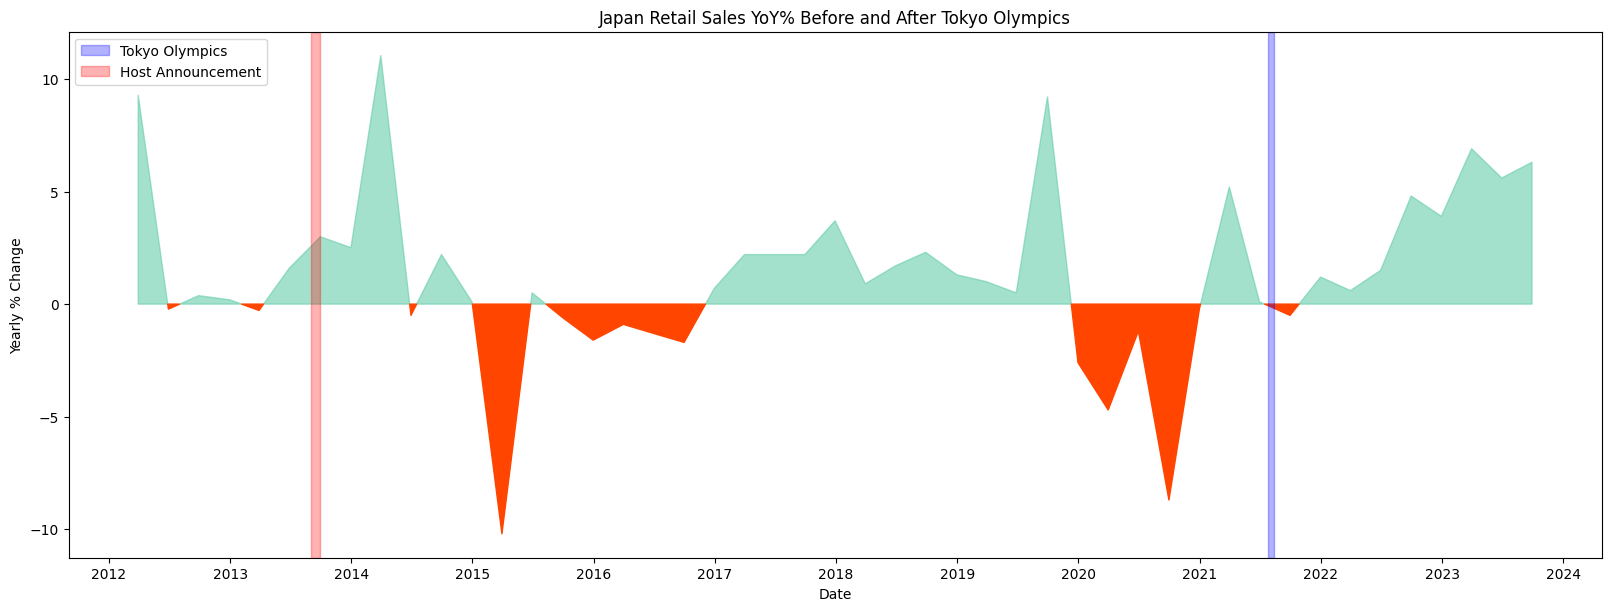

In [43]:
fig, ax = plt.subplots(figsize=(16, 6), layout='constrained')

# Sort and filter data
df_sorted = dfJPSales.sort_values('Date', ascending=True)
df_filtered = df_sorted[(df_sorted['Date'] >= '2012-01-01') & (df_sorted['Date'] <= '2023-12-01')]
xs = df_filtered['Date']
ys = df_filtered['Yearly % Change']

# Fill positive areas (green) and negative areas (red) without plotting a line
plt.fill_between(xs, ys, 0, where=(ys >= 0), color='mediumaquamarine', alpha=.6, interpolate=True)
plt.fill_between(xs, ys, 0, where=(ys < 0), color='orangered', alpha=1, interpolate=True)

plt.xlabel('Date')
plt.ylabel('Yearly % Change')
#plt.ylim(-18, 18)
#plt.yticks(range(-18, 19, 2))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Highlight event period
highlight_start2 = pd.to_datetime('2021-07-27')
highlight_end2 = pd.to_datetime('2021-08-13')
plt.axvspan(highlight_start2, highlight_end2, color='blue', alpha=0.3, label='Tokyo Olympics')
highlight_start4 = '2013-09-01'
highlight_end4 = '2013-09-30'
plt.axvspan(highlight_start4, highlight_end4, color='red', alpha=0.3, label='Host Announcement')

plt.legend(loc= 'upper left')
plt.title('Japan Retail Sales YoY% Before and After Tokyo Olympics')
plt.show()

In [44]:
dfUKSales = pd.read_excel('DatasetsCollected.xlsx', sheet_name='UK Retail Sales')
dfUKSales.head()

Months       Date  YoY%
0       1 2025-01-31   1.2
1      12 2024-12-31   2.1
2      11 2024-11-30  -0.7
3      10 2024-10-31   1.0
4       9 2024-09-30   2.5

In [45]:
dfUKSales.columns

Index(['Months', 'Date', 'YoY%'], dtype='object')

In [46]:
dfUKSales.describe()

Months                           Date        YoY%
count  241.000000                            241  241.000000
mean     6.477178  2015-01-29 20:54:46.307053824    1.110788
min      1.000000            2005-01-31 00:00:00  -18.300000
25%      3.000000            2010-01-31 00:00:00   -0.700000
50%      6.000000            2015-01-31 00:00:00    1.400000
75%      9.000000            2020-01-31 00:00:00    3.000000
max     12.000000            2025-01-31 00:00:00   35.700000
std      3.470185                            NaN    4.125203

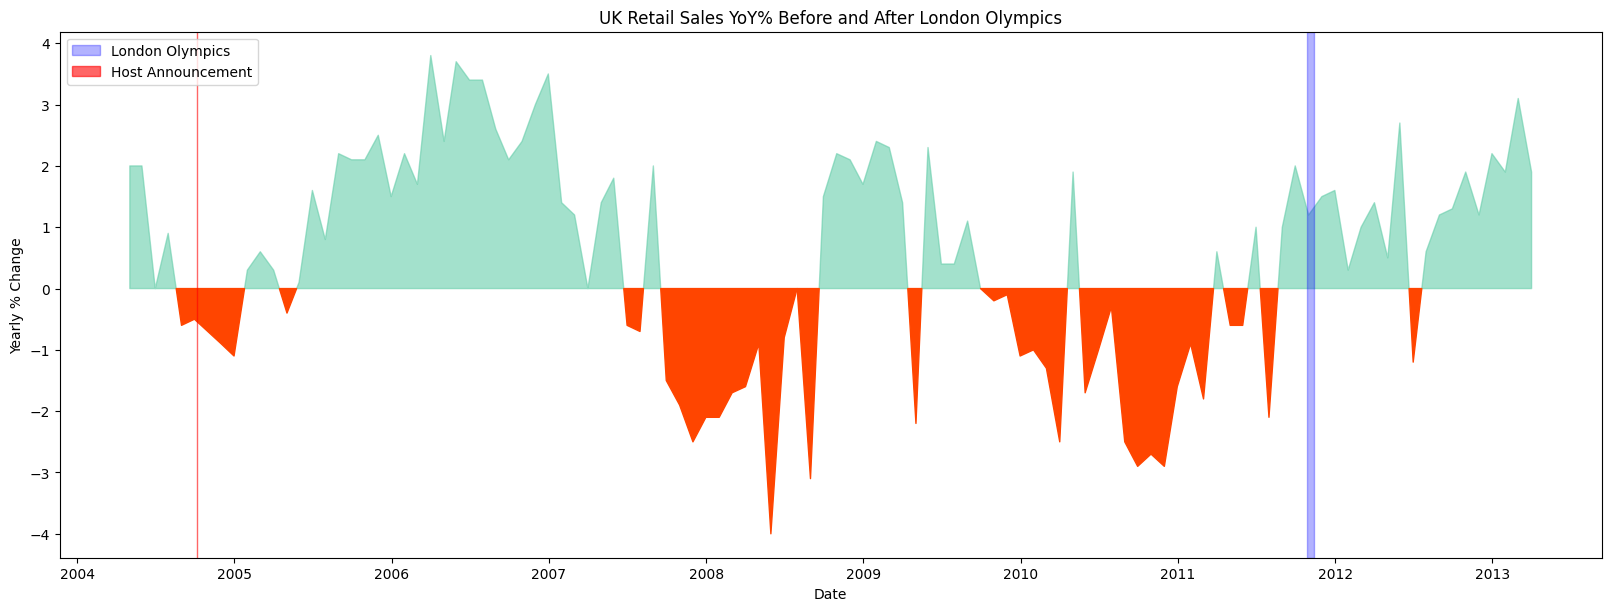

In [47]:
fig, ax = plt.subplots(figsize=(16, 6), layout='constrained')

# Sort and filter data
df_sorted = dfUKSales.sort_values('Date', ascending=True)
df_filtered = df_sorted[(df_sorted['Date'] >= '2002-01-01') & (df_sorted['Date'] <= '2014-01-01')]
xs = df_filtered['Date']
ys = df_filtered['YoY%']

# Fill positive areas (green) and negative areas (red) without plotting a line
plt.fill_between(xs, ys, 0, where=(ys >= 0), color='mediumaquamarine', alpha=.6, interpolate=True)
plt.fill_between(xs, ys, 0, where=(ys < 0), color='orangered', alpha=1, interpolate=True)

plt.xlabel('Date')
plt.ylabel('Yearly % Change')
#plt.ylim(-18, 18)
#plt.yticks(range(-18, 19, 2))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Highlight event period
highlight_start3 = '2012-07-27'
highlight_end3 = '2012-08-13'
plt.axvspan(highlight_start3, highlight_end3, color='blue', alpha=0.3, label='London Olympics')
highlight_start3 = '2005-07-06'
highlight_end3 = '2005-07-06'
plt.axvspan(highlight_start3, highlight_end3, color='red', alpha=0.6, label='Host Announcement')

plt.legend(loc= 'upper left')
plt.title('UK Retail Sales YoY% Before and After London Olympics')
plt.show()

In [48]:
dfBrazilSales = pd.read_excel('DatasetsCollected.xlsx', sheet_name='Brasil Retail Sales')
dfBrazilSales.head()

Months       Date  YOY %  Change
0       1 2025-01-31            3.1
1      12 2024-12-31            2.0
2       9 2024-09-30            2.3
3       6 2024-06-28            4.1
4       3 2024-03-29            5.7

In [49]:
dfBrazilSales['Country'] = 'Brasil'
dfUKSales['Country'] = 'UK'
dfJPSales['Country'] = 'Japan'
dfBrazilSales = dfBrazilSales.rename(columns={'YOY%  Change': 'YoY % Change'})
dfUKSales.rename(columns={'YoY%': 'YoY % Change'}, inplace=True)
dfJPSales.rename(columns={'Yearly % Change': 'YoY % Change'}, inplace=True)

In [50]:
dfBrazilSales.columns

Index(['Months', 'Date', 'YOY %  Change', 'Country'], dtype='object')

In [51]:
dfBrazilSales.describe()

Months                           Date  YOY %  Change
count  97.000000                             97      97.000000
mean    7.432990  2013-03-30 01:58:45.773195776       3.148454
min     1.000000            2001-03-30 00:00:00     -11.400000
25%     3.000000            2007-03-30 00:00:00       0.200000
50%     6.000000            2013-03-29 00:00:00       3.200000
75%     9.000000            2019-03-29 00:00:00       6.700000
max    12.000000            2025-01-31 00:00:00      15.700000
std     3.418416                            NaN       5.348386

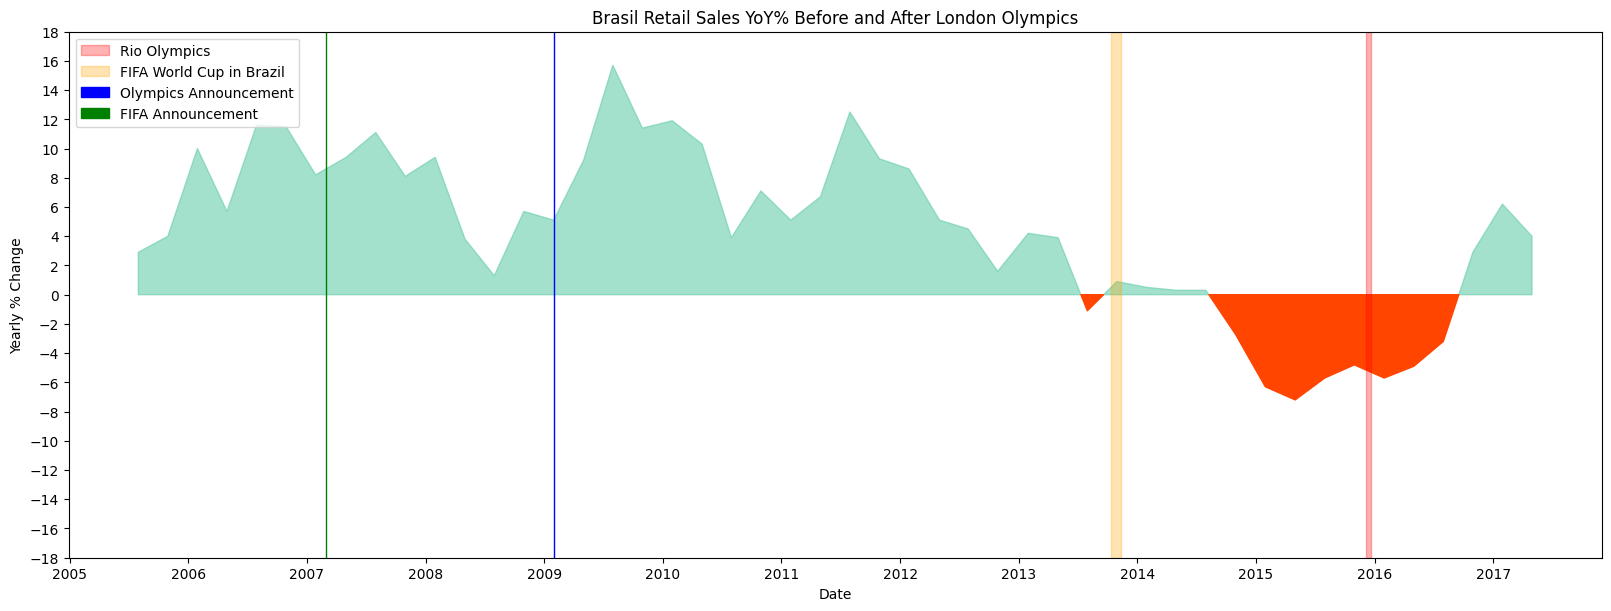

In [52]:
fig, ax = plt.subplots(figsize=(16, 6), layout='constrained')

# Sort and filter data
df_sorted = dfBrazilSales.sort_values('Date', ascending=True)
df_filtered = df_sorted[(df_sorted['Date'] >= '2006-01-01') & (df_sorted['Date'] <= '2018-01-01')]
xs = df_filtered['Date']
ys = df_filtered['YOY %  Change']

# Fill positive areas (green) and negative areas (red) without plotting a line
plt.fill_between(xs, ys, 0, where=(ys >= 0), color='mediumaquamarine', alpha=.6, interpolate=True)
plt.fill_between(xs, ys, 0, where=(ys < 0), color='orangered', alpha=1, interpolate=True)

plt.xlabel('Date')
plt.ylabel('Yearly % Change')
plt.ylim(-18, 18)
plt.yticks(range(-18, 19, 2))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Highlight event period
highlight_start = '2016-08-05'
highlight_end = '2016-08-21'
plt.axvspan(highlight_start, highlight_end, color='red', alpha=0.3, label='Rio Olympics')
highlight_start1 = '2014-06-12'
highlight_end1 = '2014-07-13'
plt.axvspan(highlight_start1, highlight_end1, color='orange', alpha=0.3, label='FIFA World Cup in Brazil')
highlight_start2 = '2009-10-01'
highlight_end2 = '2009-10-02'
plt.axvspan(highlight_start2, highlight_end2, color='blue', alpha=1, label='Olympics Announcement')
highlight_start3 = '2007-10-29'
highlight_end3 = '2007-10-31'
plt.axvspan(highlight_start3, highlight_end3, color='green', alpha=1, label='FIFA Announcement')

plt.legend(loc= 'upper left')
plt.title('Brasil Retail Sales YoY% Before and After London Olympics')
plt.show()

In [53]:
# append datasets together
df_retail_sales = pd.concat([dfUKSales, dfJPSales, dfBrazilSales], ignore_index=True)
df_retail_sales.head()

Months       Date  YoY % Change Country  YOY %  Change
0       1 2025-01-31           1.2      UK            NaN
1      12 2024-12-31           2.1      UK            NaN
2      11 2024-11-30          -0.7      UK            NaN
3      10 2024-10-31           1.0      UK            NaN
4       9 2024-09-30           2.5      UK            NaN

STOCK MARKET DAILY

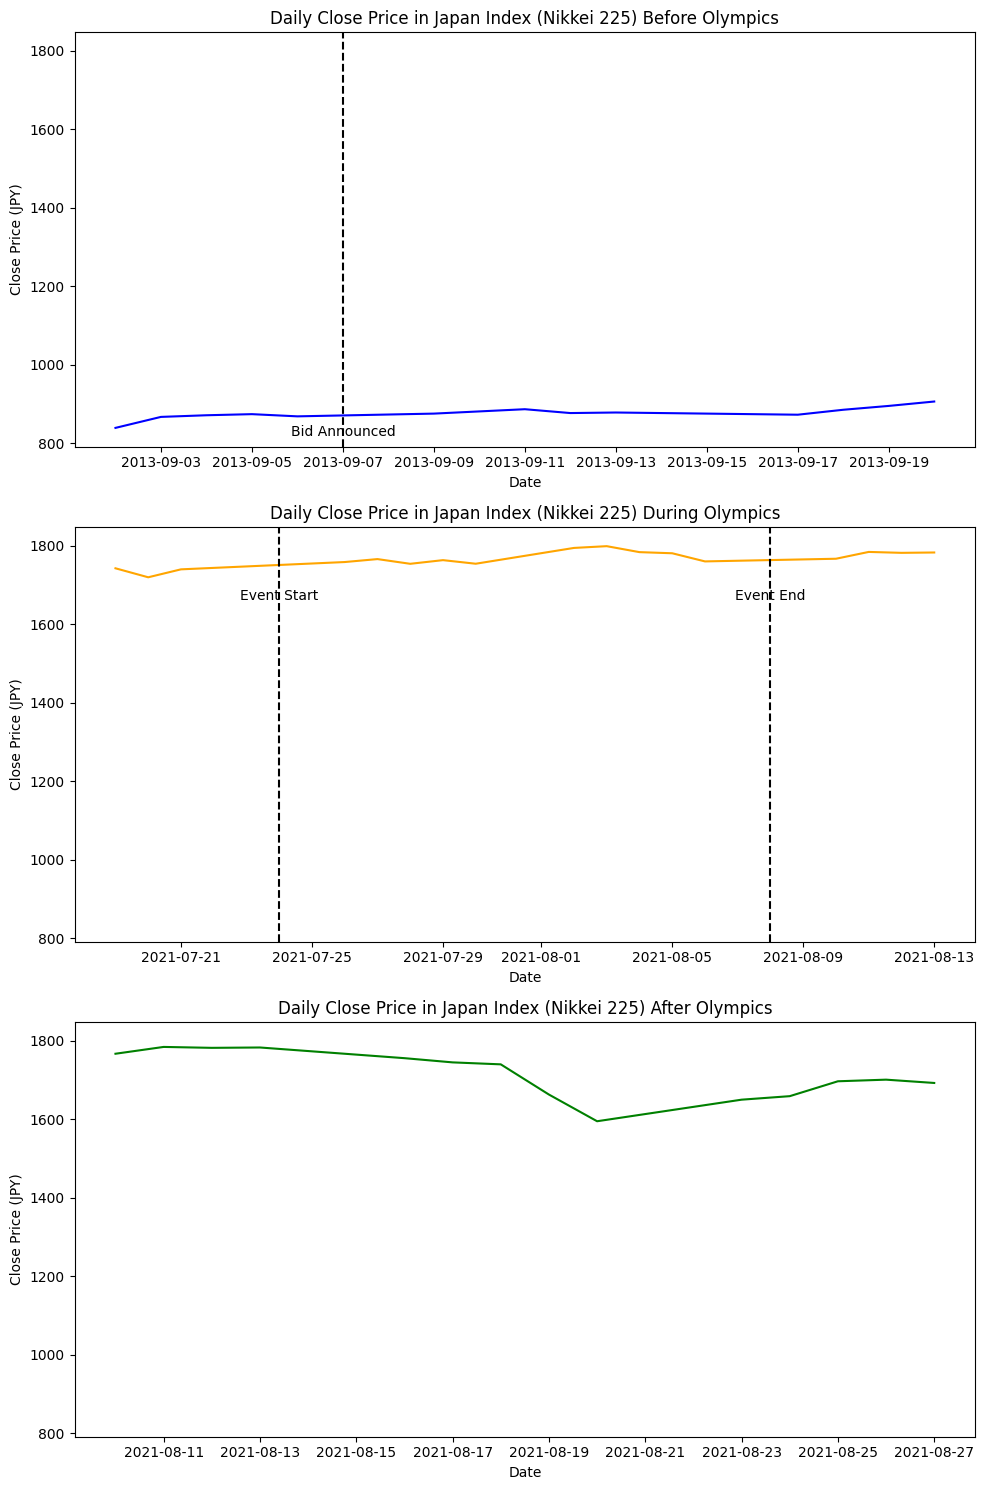

In [54]:
# Function to plot stock data before, during, and after an event for any country
def plot_event_data(country, bid_announce_date, event_start, event_end, country_name, event_name, index_name):
    # Download daily stock data for the country's stock index
    df_stock = yf.download(country, start='1996-01-01', end='2025-01-01', progress=False)

    # Time Windows for Before, During, and After the Event:
    # Before the event
    before_event_start = bid_announce_date - pd.Timedelta(days=7)
    before_event_end = bid_announce_date + pd.Timedelta(days=14)

    # During the event
    during_event_start = event_start - pd.Timedelta(days=7)
    during_event_end = event_end + pd.Timedelta(days=7)

    # After the event
    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=21)

    # Filter data for the before, during, and after periods
    before_event_data = df_stock.loc[before_event_start:before_event_end]
    during_event_data = df_stock.loc[during_event_start:during_event_end]
    after_event_data = df_stock.loc[after_event_start:after_event_end]

    # Plotting with shared y-axis
    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharey=True)

    # Plot 1: Before the event
    axs[0].plot(before_event_data.index, before_event_data['Close'], label='Before Event', color='blue')
    axs[0].set_title(f'Daily Close Price in {country_name} Index ({index_name}) Before {event_name}')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Close Price (JPY)')
    axs[0].axvline(x=bid_announce_date, color='black', linestyle='--', label="Bid Announced")
    axs[0].text(bid_announce_date, axs[0].get_ylim()[1] * 0.9, 'Bid Announced', color='black', ha='center')

    # Plot 2: During the event
    axs[1].plot(during_event_data.index, during_event_data['Close'], label='During Event', color='orange')
    axs[1].set_title(f'Daily Close Price in {country_name} Index ({index_name}) During {event_name}')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Close Price (JPY)')
    axs[1].axvline(x=event_start, color='black', linestyle='--', label="Event Start")
    axs[1].axvline(x=event_end, color='black', linestyle='--', label="Event End")
    axs[1].text(event_start, axs[1].get_ylim()[1] * 0.9, 'Event Start', color='black', ha='center')
    axs[1].text(event_end, axs[1].get_ylim()[1] * 0.9, 'Event End', color='black', ha='center')

    # Plot 3: After the event
    axs[2].plot(after_event_data.index, after_event_data['Close'], label='After Event', color='green')
    axs[2].set_title(f'Daily Close Price in {country_name} Index ({index_name}) After {event_name}')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Close Price (JPY)')

    plt.tight_layout()
    plt.show()


plot_event_data('7203.T', pd.to_datetime('2013-09-07'), pd.to_datetime('2021-07-24'), pd.to_datetime('2021-08-08'),
                country_name='Japan', event_name='Olympics', index_name='Nikkei 225')


In [55]:
# Function to plot stock data before, during, and after an event for any country
def plot_event_data(country, bid_announce_date, event_start, event_end, country_name, event_name, index_name):
    # Download daily stock data for the country's stock index
    df_stock = yf.download(country, start='1996-01-01', end='2025-01-01', progress=False)

    # Calculate the daily returns (percentage change)
    df_stock['Daily Return'] = df_stock['Close'].pct_change() * 100

    # Time Windows for Before, During, and After the Event:
    # Before the event
    before_event_start = bid_announce_date - pd.Timedelta(days=7)
    before_event_end = bid_announce_date + pd.Timedelta(days=14)

    # During the event
    during_event_start = event_start - pd.Timedelta(days=7)
    during_event_end = event_end + pd.Timedelta(days=7)

    # After the event
    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=21)

    # Filter data for the before, during, and after periods
    before_event_data = df_stock.loc[before_event_start:before_event_end]
    during_event_data = df_stock.loc[during_event_start:during_event_end]
    after_event_data = df_stock.loc[after_event_start:after_event_end]

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot 1: Before the event
    axs[0].plot(before_event_data.index, before_event_data['Daily Return'], label='Before Event', color='blue')
    axs[0].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) Before {event_name}')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Daily Percentage Change (%)')
    axs[0].axvline(x=bid_announce_date, color='black', linestyle='--', label="Bid Announced")
    axs[0].text(bid_announce_date, axs[0].get_ylim()[1] * 0.9, 'Bid Announced', color='black', ha='center')
    axs[0].set_ylim(-4.5, 4.5)

    # Plot 2: During the event
    axs[1].plot(during_event_data.index, during_event_data['Daily Return'], label='During Event', color='orange')
    axs[1].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) During {event_name}')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Daily Percentage Change (%)')
    axs[1].axvline(x=event_start, color='black', linestyle='--', label="Event Start")
    axs[1].axvline(x=event_end, color='black', linestyle='--', label="Event End")
    axs[1].text(event_start, axs[1].get_ylim()[1] * 0.9, 'Event Start', color='black', ha='center')
    axs[1].text(event_end, axs[1].get_ylim()[1] * 0.9, 'Event End', color='black', ha='center')
    axs[1].set_ylim(-4.5, 4.5)

    # Plot 3: After the event
    axs[2].plot(after_event_data.index, after_event_data['Daily Return'], label='After Event', color='green')
    axs[2].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) After {event_name}')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Daily Percentage Change (%)')
    axs[2].set_ylim(-4.5, 4.5)

    plt.tight_layout()
    plt.show()


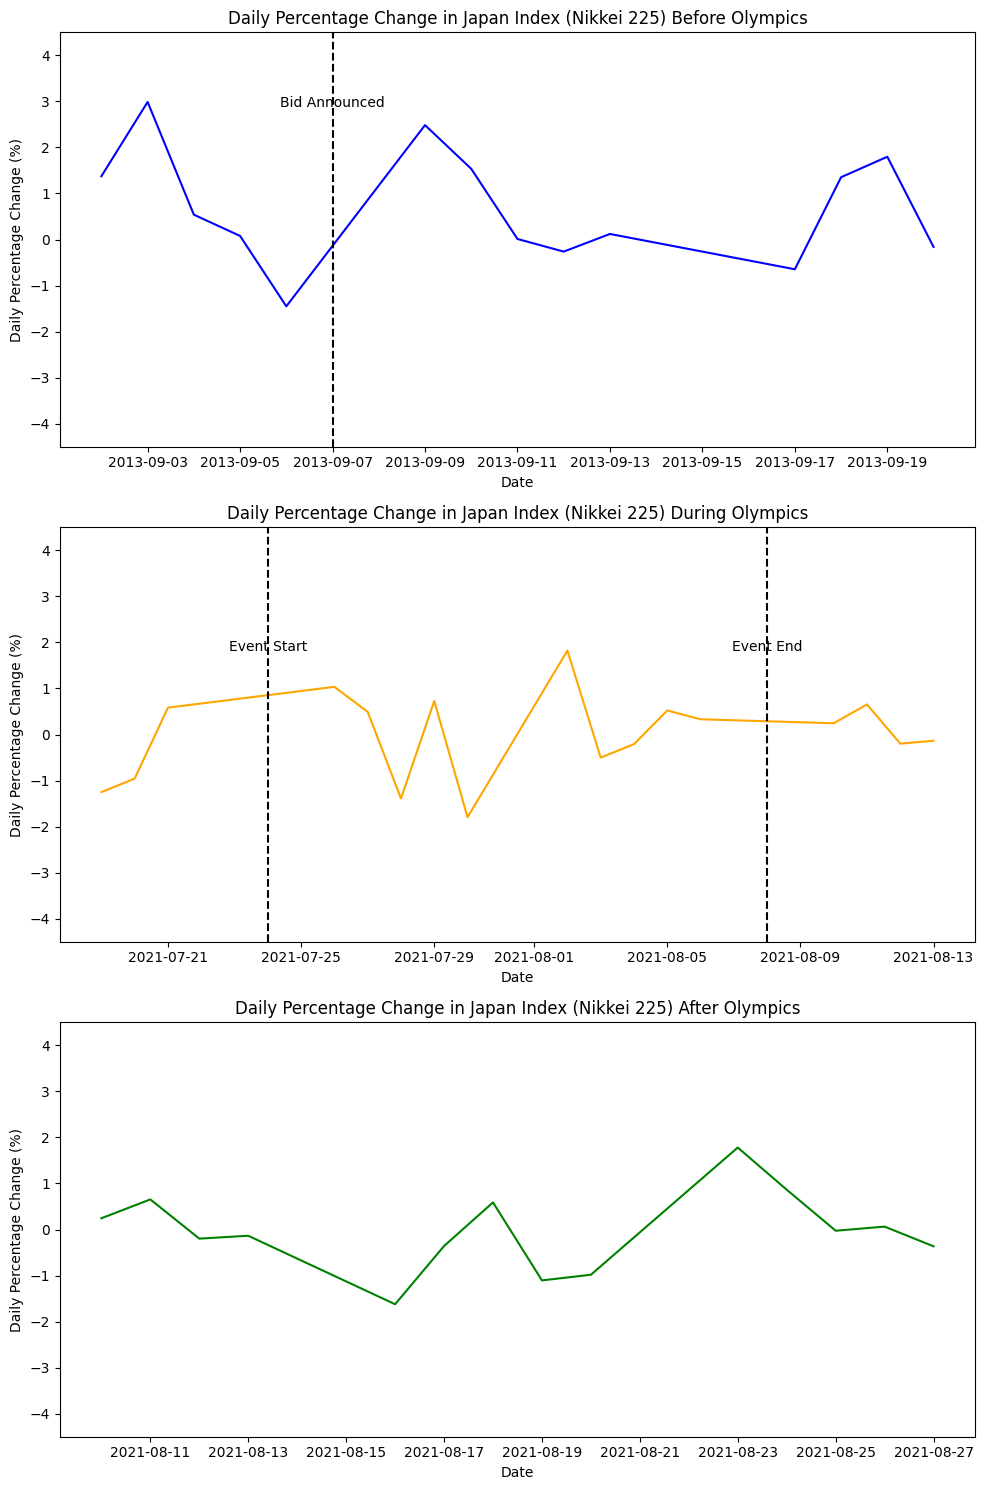

In [56]:
# Japan - Olympics (Tokyo)
plot_event_data('^N225', pd.to_datetime('2013-09-07'), pd.to_datetime('2021-07-24'), pd.to_datetime('2021-08-08'),
                country_name='Japan', event_name='Olympics', index_name='Nikkei 225')


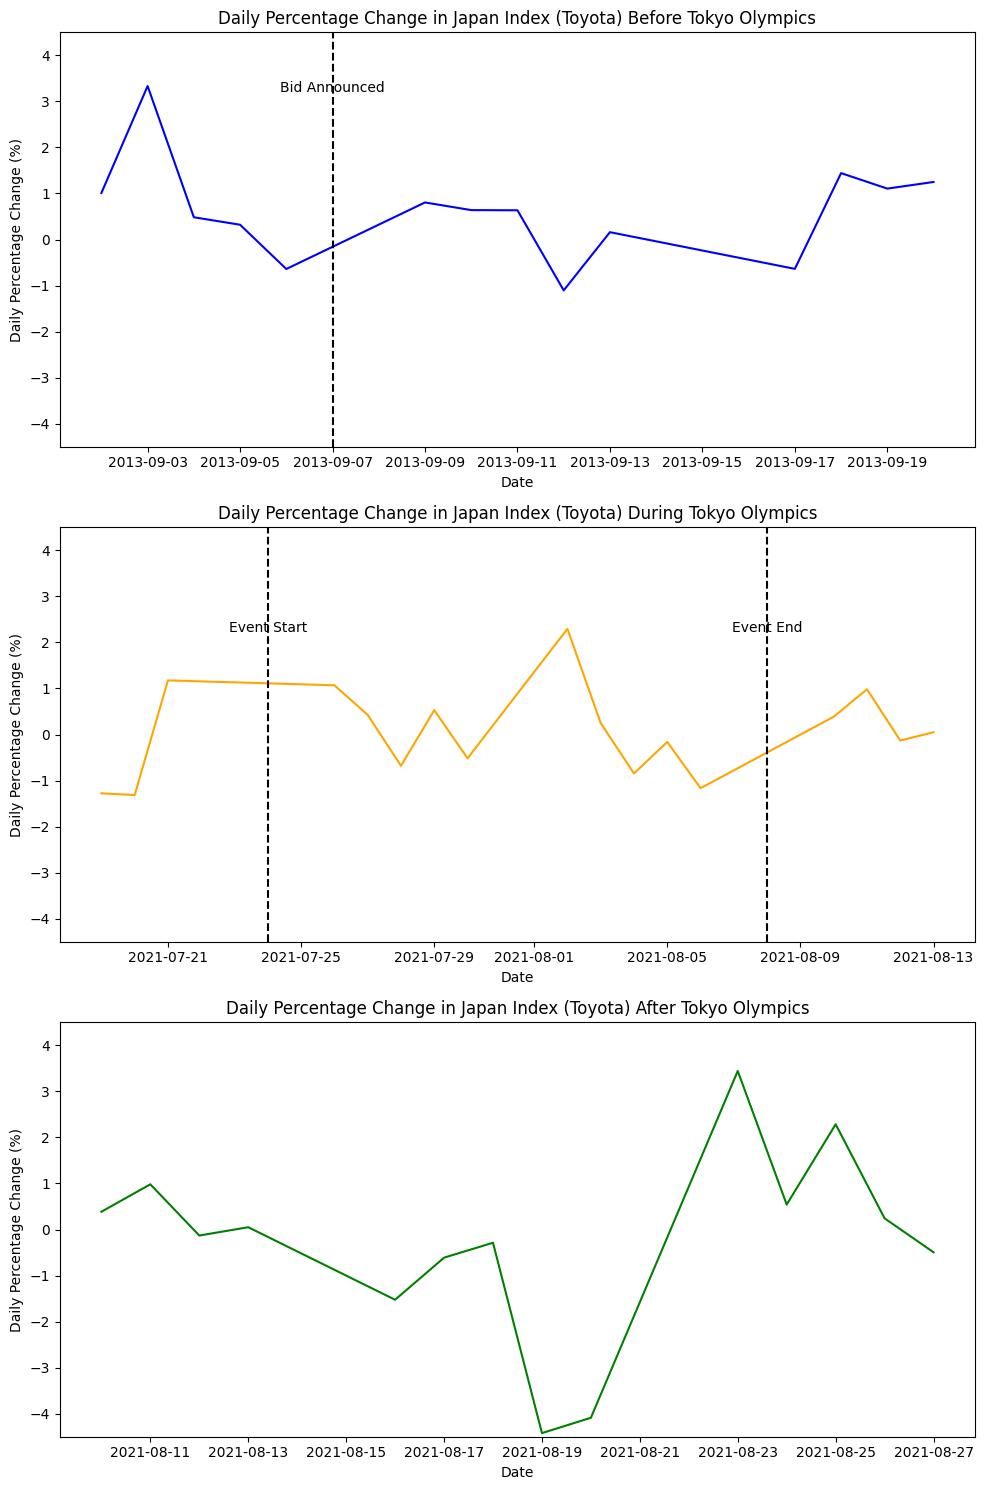

In [57]:
# For Japan (Tokyo Olympics), using Toyota (7203.T)
plot_event_data(
    '7203.T',
    pd.to_datetime('2013-09-07'),
    pd.to_datetime('2021-07-24'),
    pd.to_datetime('2021-08-08'),
    country_name='Japan',
    event_name='Tokyo Olympics',
    index_name='Toyota'
)

In [58]:
# Function to plot stock data for the country's index and an Olympic partner/sponsor before, during, and after an event
def plot_event_data(country_index, olympics_partner, bid_announce_date, event_start, event_end, country_name, event_name, index_name, partner_name):
    # Download daily stock data for the country index and Olympics partner/sponsor
    df_stock_index = yf.download(country_index, start='1994-01-01', end='2025-01-01', progress=False)
    df_partner_stock = yf.download(olympics_partner, start='1996-01-01', end='2025-01-01', progress=False)

    # Calculate the daily returns (percentage change)
    df_stock_index['Daily Return'] = df_stock_index['Close'].pct_change() * 100
    df_partner_stock['Daily Return'] = df_partner_stock['Close'].pct_change() * 100

    # Time Windows for Before, During, and After the Event:
    before_event_start = bid_announce_date - pd.Timedelta(days=7)
    before_event_end = bid_announce_date + pd.Timedelta(days=14)

    during_event_start = event_start - pd.Timedelta(days=7)
    during_event_end = event_end + pd.Timedelta(days=7)

    after_event_start = event_end + pd.Timedelta(days=0)
    after_event_end = event_end + pd.Timedelta(days=21)

    # Filter data for the before, during, and after periods
    before_event_data_index = df_stock_index.loc[before_event_start:before_event_end]
    during_event_data_index = df_stock_index.loc[during_event_start:during_event_end]
    after_event_data_index = df_stock_index.loc[after_event_start:after_event_end]

    before_event_data_partner = df_partner_stock.loc[before_event_start:before_event_end]
    during_event_data_partner = df_partner_stock.loc[during_event_start:during_event_end]
    after_event_data_partner = df_partner_stock.loc[after_event_start:after_event_end]

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot 1: Before the event
    axs[0].plot(before_event_data_index.index, before_event_data_index['Daily Return'], label=f'{index_name}', color='blue')
    axs[0].plot(before_event_data_partner.index, before_event_data_partner['Daily Return'], label=f'{partner_name}', color='orange')
    axs[0].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) and Partner Before {event_name}')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Daily Percentage Change (%)')
    axs[0].axvline(x=bid_announce_date, color='black', linestyle='--', label="Bid Announced")
    axs[0].set_ylim(-5, 5)
    axs[0].legend()

    # Plot 2: During the event
    axs[1].plot(during_event_data_index.index, during_event_data_index['Daily Return'], label=f'{index_name}', color='blue')
    axs[1].plot(during_event_data_partner.index, during_event_data_partner['Daily Return'], label=f'{partner_name}', color='orange')
    axs[1].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) and Partner During {event_name}')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Daily Percentage Change (%)')
    axs[1].axvline(x=event_start, color='black', linestyle='--', label="Event Start")
    axs[1].axvline(x=event_end, color='black', linestyle='--', label="Event End")
    axs[1].set_ylim(-5, 5)
    axs[1].legend()

    # Plot 3: After the event
    axs[2].plot(after_event_data_index.index, after_event_data_index['Daily Return'], label=f'{index_name}', color='blue')
    axs[2].plot(after_event_data_partner.index, after_event_data_partner['Daily Return'], label=f'{partner_name}', color='orange')
    axs[2].set_title(f'Daily Percentage Change in {country_name} Index ({index_name}) and Partner After {event_name}')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Daily Percentage Change (%)')
    axs[2].set_ylim(-5, 5)
    axs[2].legend()

    plt.tight_layout()
    plt.show()


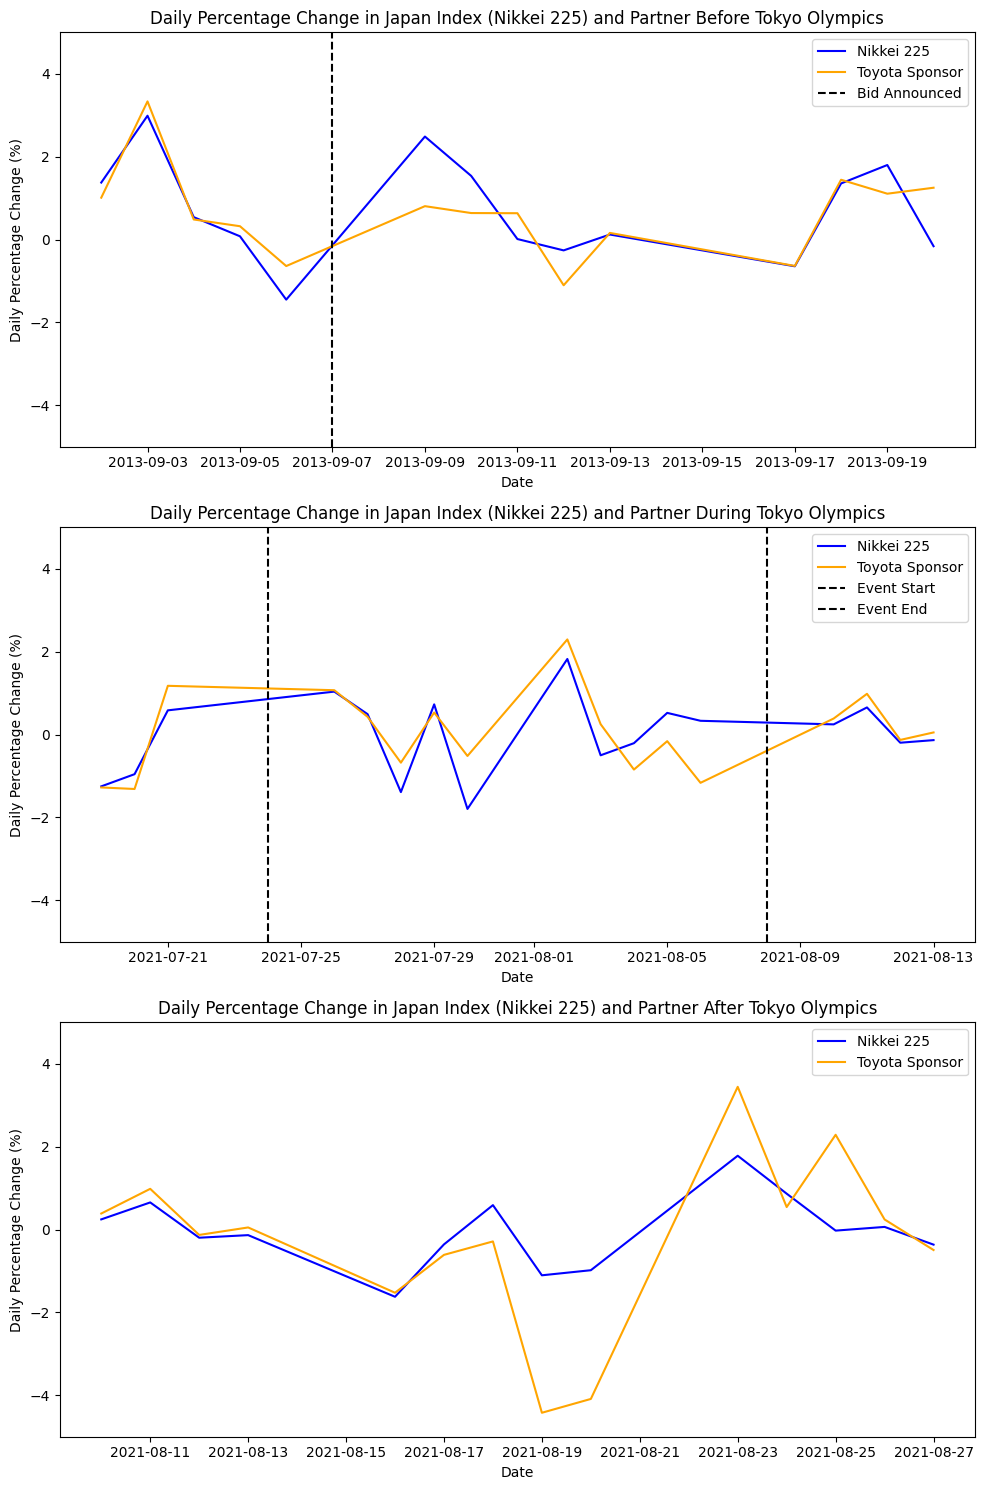

In [59]:
# Toyota - Olympic sponsor in Japan and Japan stock index (Nikkei 225)
plot_event_data(
    '^N225',
    '7203.T',
    pd.to_datetime('2013-09-07'),
    pd.to_datetime('2021-07-24'),
    pd.to_datetime('2021-08-08'),
    country_name='Japan',
    event_name='Tokyo Olympics',
    index_name='Nikkei 225',
    partner_name='Toyota Sponsor'
)

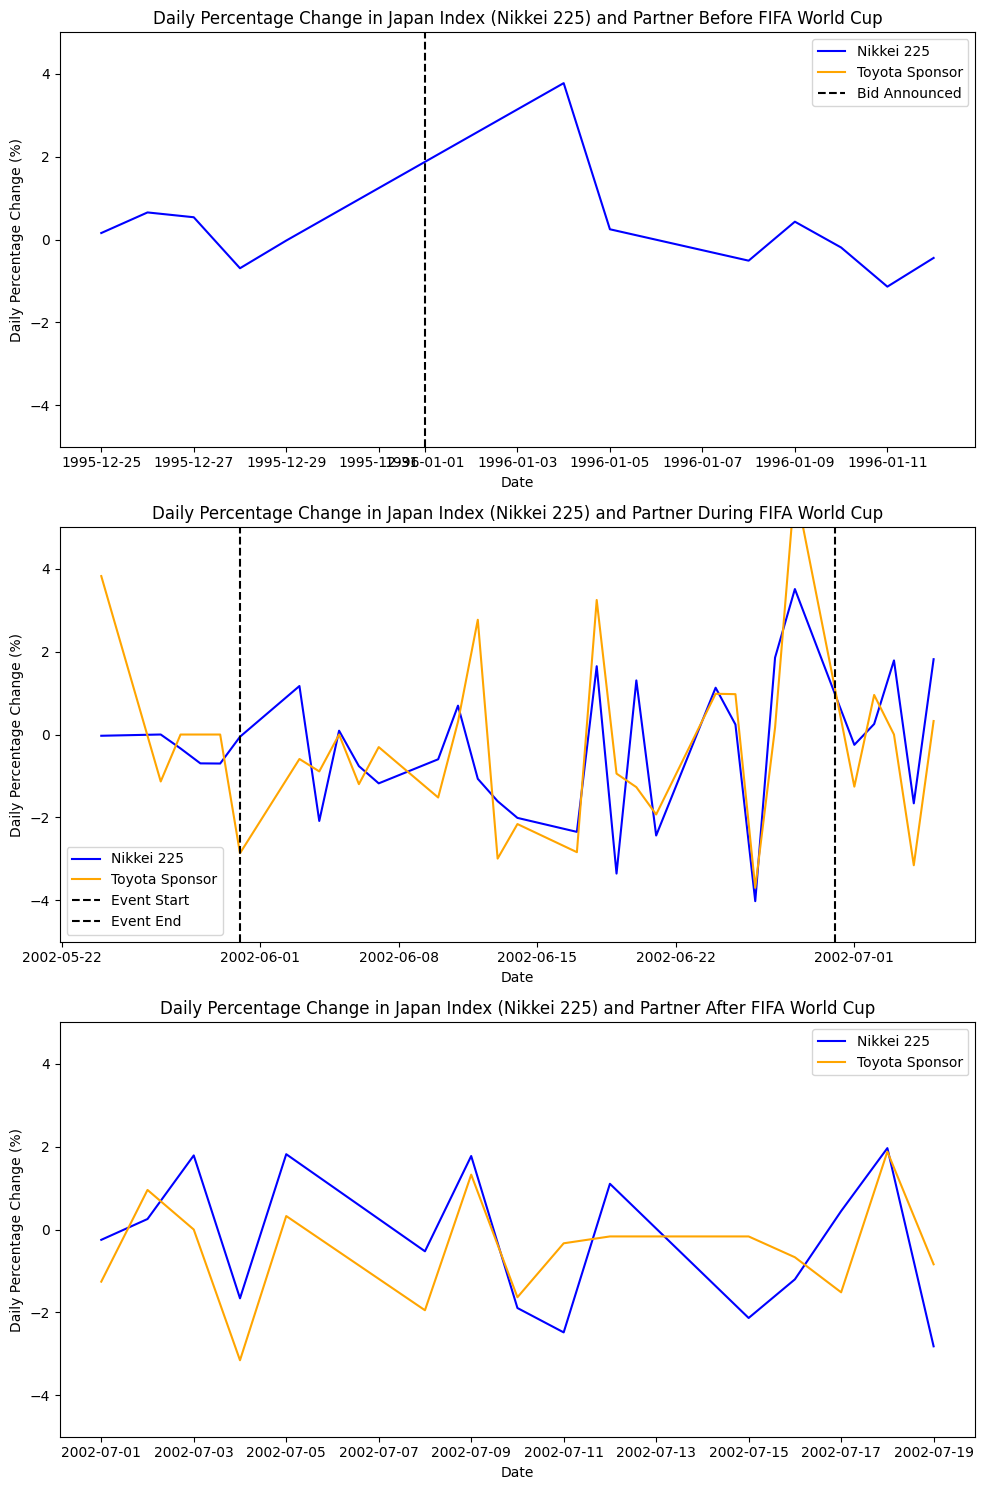

In [60]:
# Sony - FIFA World Cup sponsor and Japan stock index (Nikkei 225)
plot_event_data(
    '^N225',
    '7203.T',
    pd.to_datetime('1996-01-01'),
    pd.to_datetime('2002-05-31'),
    pd.to_datetime('2002-06-30'),
    country_name='Japan',
    event_name='FIFA World Cup',
    index_name='Nikkei 225',
    partner_name='Toyota Sponsor'
)


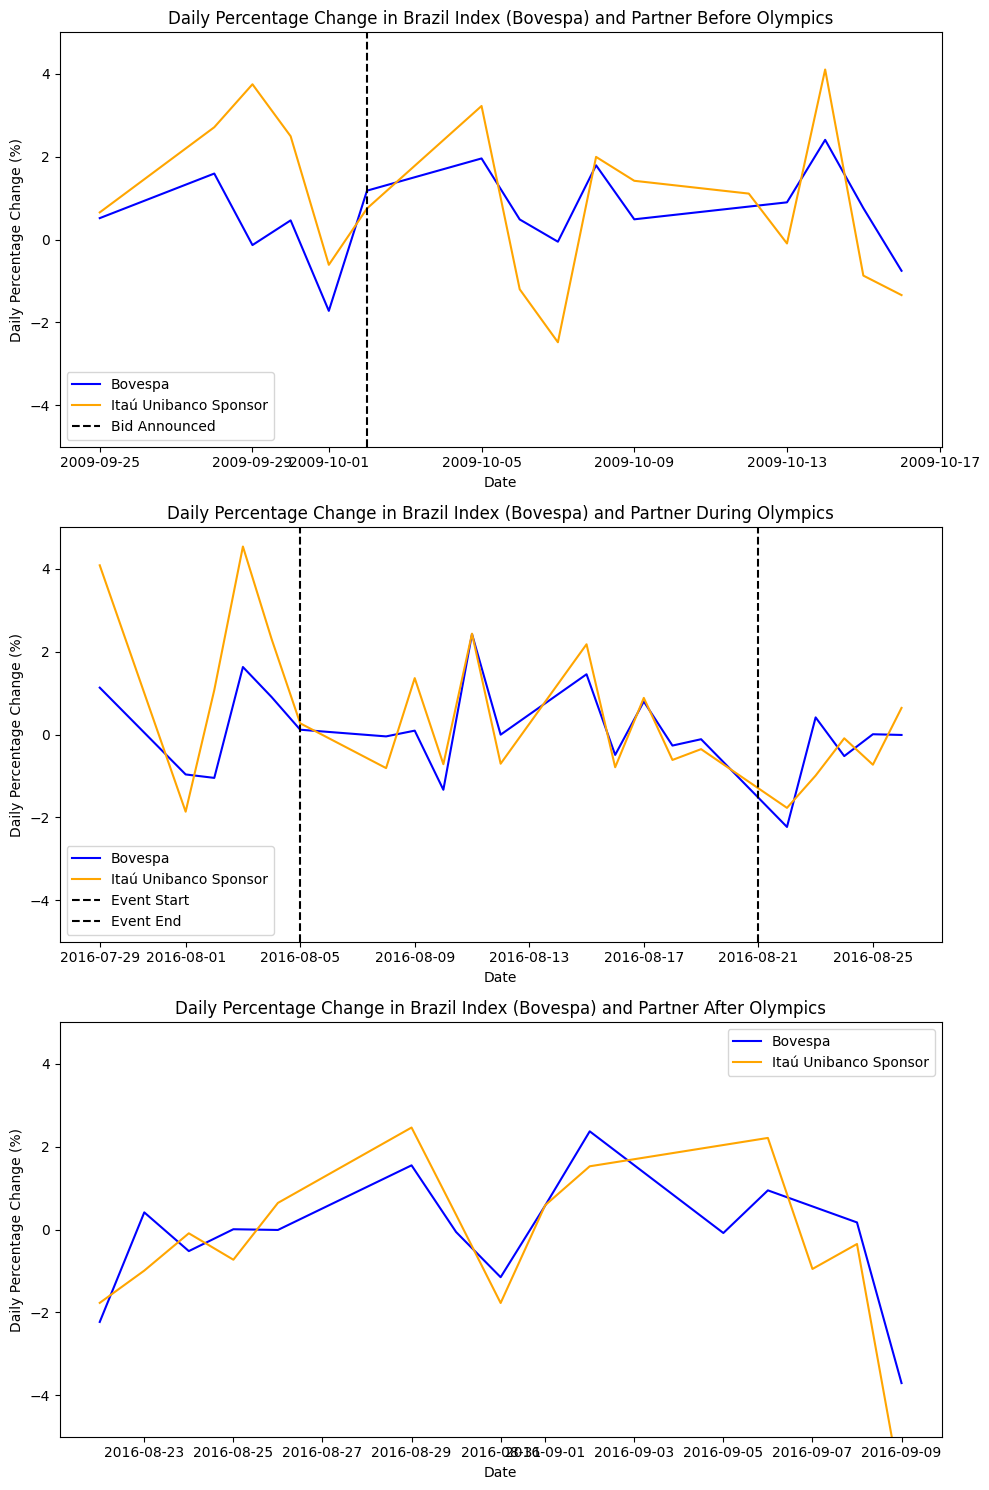

In [61]:
# Brazil Olympics (Itaú Unibanco and Bovespa)
plot_event_data(
    '^BVSP',
    'ITUB',
    pd.to_datetime('2009-10-02'),
    pd.to_datetime('2016-08-05'),
    pd.to_datetime('2016-08-21'),
    country_name='Brazil',
    event_name='Olympics',
    index_name='Bovespa',
    partner_name='Itaú Unibanco Sponsor'
)


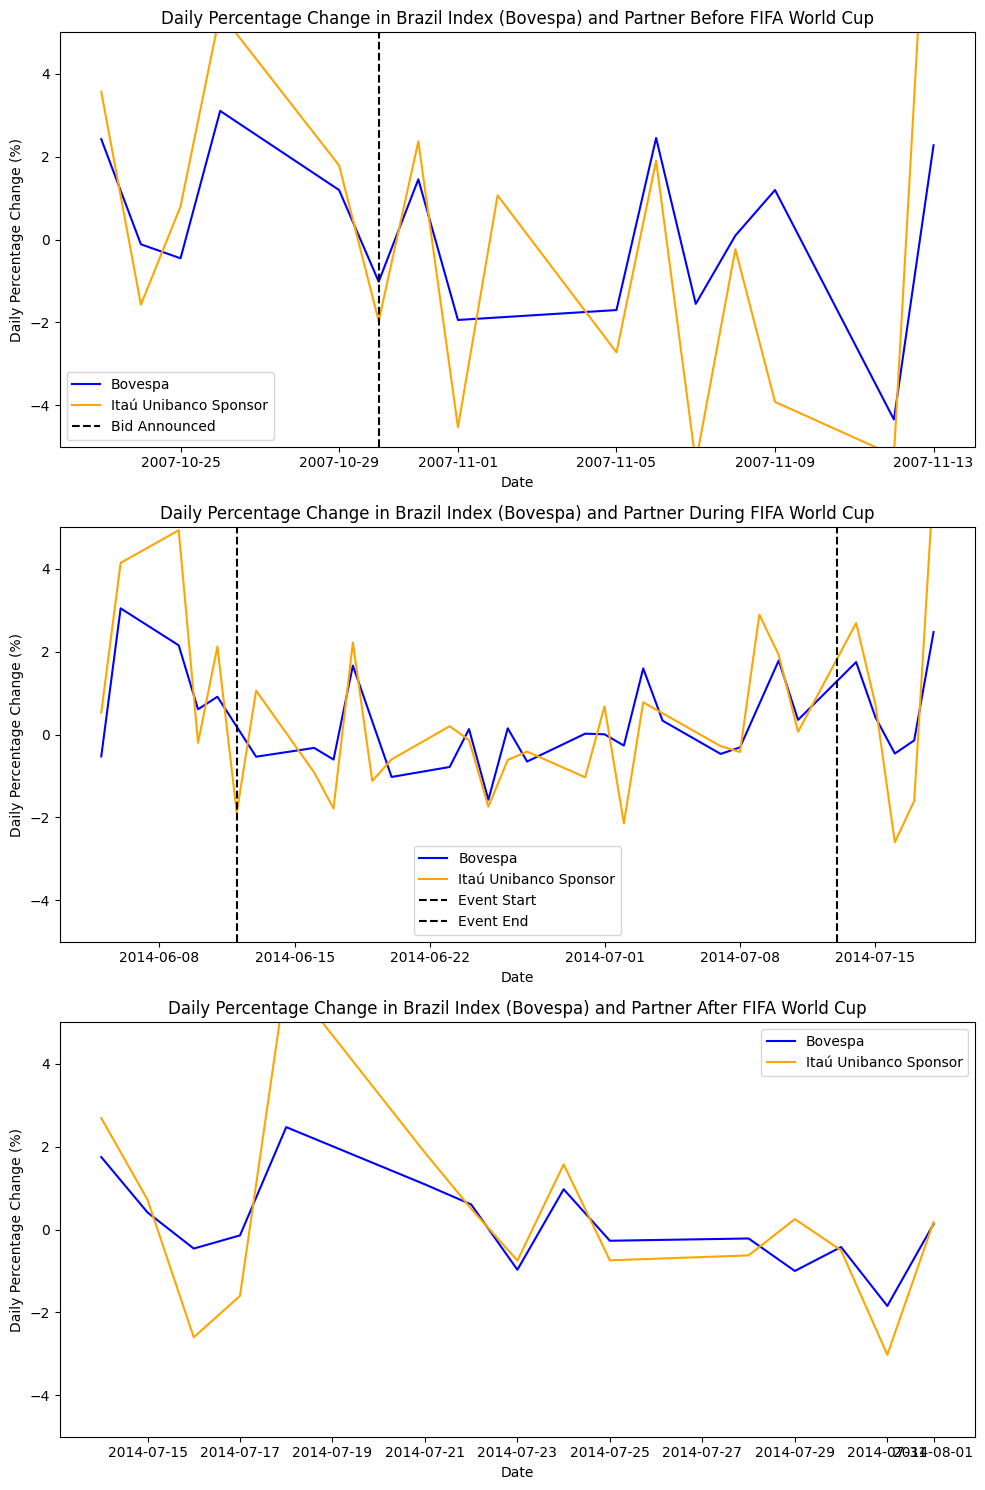

In [62]:
 # Itaú Unibanco - FIFA World Cup sponsor and Brazil stock index (Bovespa)
plot_event_data(
    '^BVSP',
    'ITUB',
    pd.to_datetime('2007-10-30'),
    pd.to_datetime('2014-06-12'),
    pd.to_datetime('2014-07-13'),
    country_name='Brazil',
    event_name='FIFA World Cup',
    index_name='Bovespa',
    partner_name='Itaú Unibanco Sponsor'
)

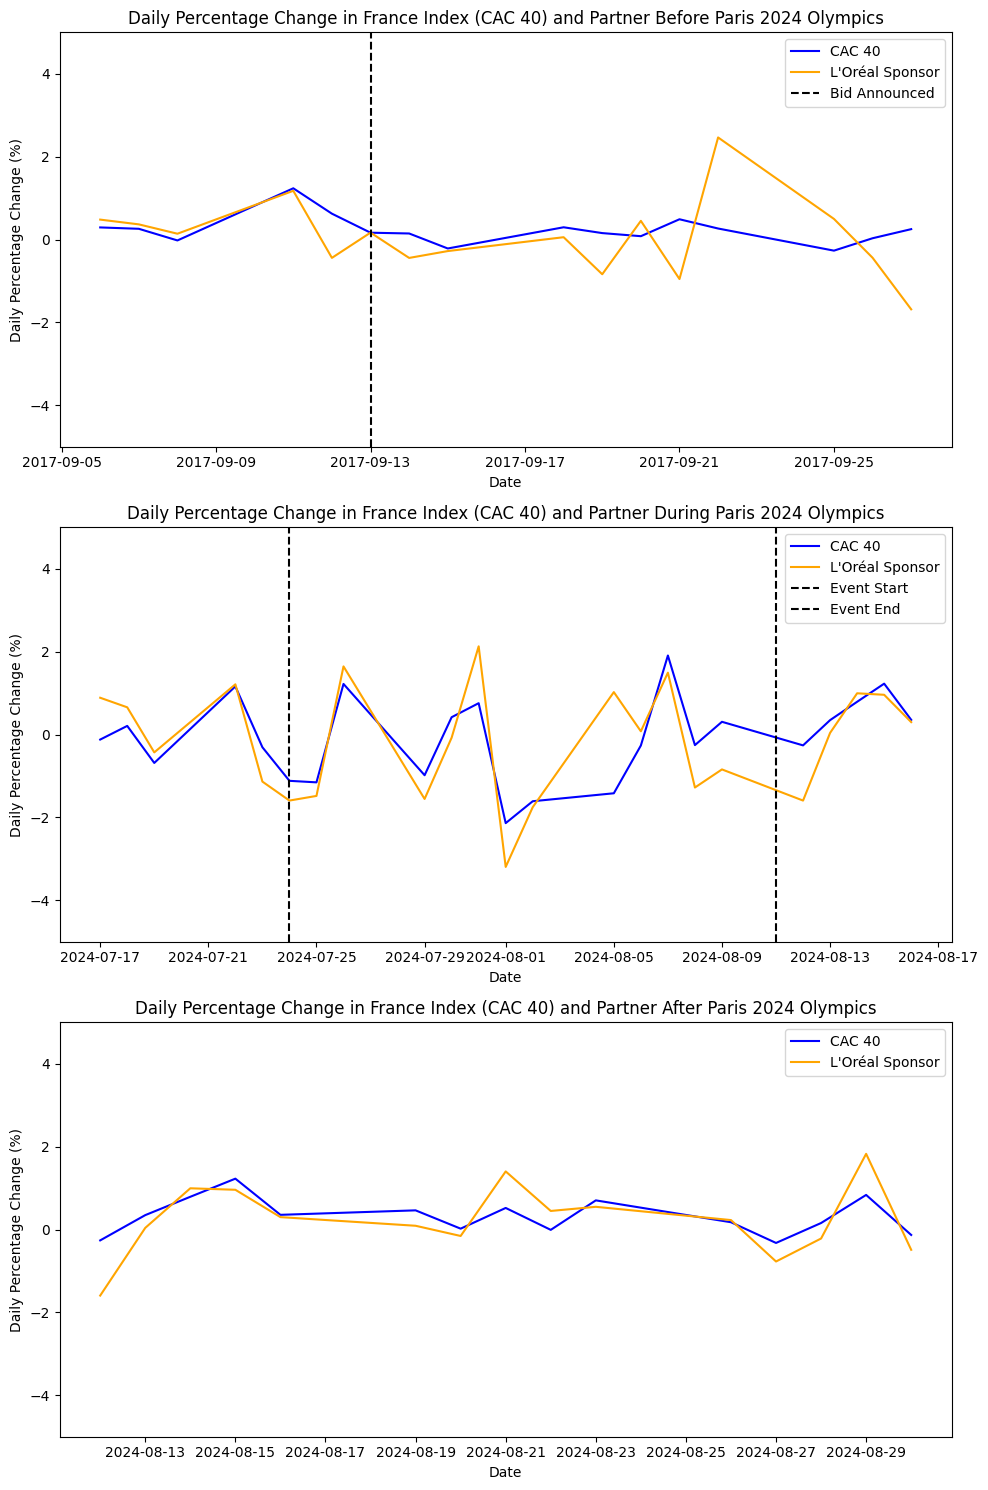

In [63]:
# L'Oréal - French Olympic partner and France stock index (CAC 40)
plot_event_data(
    '^FCHI',
    'OR.PA',
    pd.to_datetime('2017-09-13'),
    pd.to_datetime('2024-07-24'),
    pd.to_datetime('2024-08-11'),
    country_name='France',
    event_name='Paris 2024 Olympics',
    index_name='CAC 40',
    partner_name='L\'Oréal Sponsor'
)


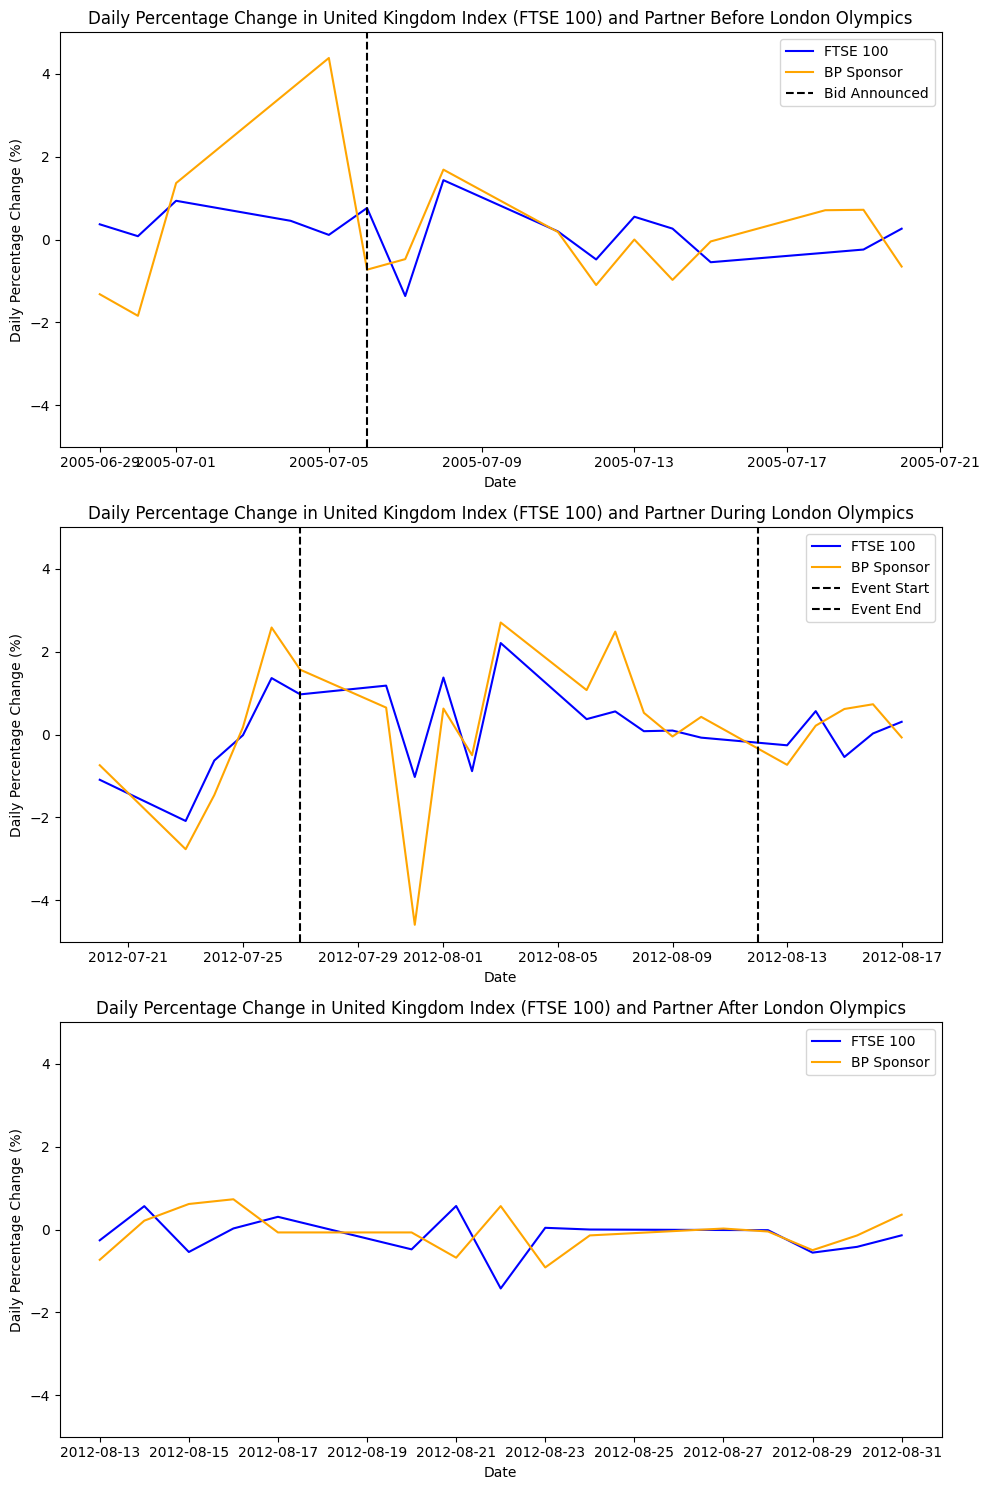

In [64]:
# BP (British Petroleum) - Olympic sponsor and UK Stock Index FTSE 100
plot_event_data(
    '^FTSE',
    'BP',
    pd.to_datetime('2005-07-06'),
    pd.to_datetime('2012-07-27'),
    pd.to_datetime('2012-08-12'),
    country_name='United Kingdom',
    event_name='London Olympics',
    index_name='FTSE 100',
    partner_name='BP Sponsor'
)

stock and YoY retail sales


In [65]:
df_sorted = dfJPSales.sort_values('Date', ascending=True)
df_filtered = df_sorted[(df_sorted['Date'] >= '2018-01-01') & (df_sorted['Date'] <= '2024-01-01')]
df_filtered.head()

Months       Date  YoY % Change Country
28       3 2018-03-30           0.9   Japan
27       6 2018-06-29           1.7   Japan
26       9 2018-09-28           2.3   Japan
25      12 2018-12-31           1.3   Japan
24       3 2019-03-29           1.0   Japan

TOURISM and STOCK MARKET

In [66]:
df_stock_bvsp = yf.download('^BVSP', start='2000-01-01', end='2025-01-01', progress=False)

print(df_stock_bvsp.head())
df_stock_bvsp_m = df_stock_bvsp['Close'].resample('MS').first()

# Convert to a DataFrame and reset index to make 'Year' a column
df_stock_bvsp_m = df_stock_bvsp_m.reset_index()
df_stock_bvsp_m['Year'] = df_stock_bvsp_m['Date'].dt.year

# Display the stock data for the first trading day of each month
print(df_stock_bvsp_m.head())

Price         Close     High      Low     Open Volume
Ticker        ^BVSP    ^BVSP    ^BVSP    ^BVSP  ^BVSP
Date                                                 
2000-01-03  16930.0  17408.0  16719.0  17098.0      0
2000-01-04  15851.0  16908.0  15851.0  16908.0      0
2000-01-05  16245.0  16302.0  15350.0  15871.0      0
2000-01-06  16107.0  16499.0  15977.0  16237.0      0
2000-01-07  16309.0  16449.0  16125.0  16125.0      0
Ticker       Date    ^BVSP  Year
0      2000-01-01  16930.0  2000
1      2000-02-01  16522.0  2000
2      2000-03-01  17953.0  2000
3      2000-04-01  17245.0  2000
4      2000-05-01  15524.0  2000


In [67]:
# BVSP Historical Data
df_brazil = yf.download('^BVSP', start='2000-01-01', end='2025-01-01', progress=False)
df_brazil_m = df_brazil['Close'].resample('MS').first()
df_brazil_m = df_brazil_m.reset_index()
print("Brazil (Ibovespa) First Trading Day Data:")
print(df_brazil_m.head())

Brazil (Ibovespa) First Trading Day Data:
Ticker       Date    ^BVSP
0      2000-01-01  16930.0
1      2000-02-01  16522.0
2      2000-03-01  17953.0
3      2000-04-01  17245.0
4      2000-05-01  15524.0


In [68]:
# FTSE Historical Data
df_uk = yf.download('^FTSE', start='2000-01-01', end='2025-01-01', progress=False)
df_uk_m = df_uk['Close'].resample('MS').first()
df_uk_m = df_uk_m.reset_index()
print("\nUK (FTSE 100) First Trading Day Data:")
print(df_uk_m.head())


UK (FTSE 100) First Trading Day Data:
Ticker       Date        ^FTSE
0      2000-01-01  6665.899902
1      2000-02-01  6290.899902
2      2000-03-01  6364.899902
3      2000-04-01  6462.100098
4      2000-05-01  6373.399902


In [69]:
# N225 Historical Data

df_japan = yf.download('^N225', start='1994-01-01', end='2025-01-01', progress=False)
df_japan_m = df_japan['Close'].resample('MS').first()
df_japan_m = df_japan_m.reset_index()
print("\nJapan (Nikkei 225) First Trading Day Data:")
print(df_japan_m.head())



Japan (Nikkei 225) First Trading Day Data:
Ticker       Date         ^N225
0      1994-01-01  17369.740234
1      1994-02-01  20416.339844
2      1994-03-01  20216.619141
3      1994-04-01  19277.160156
4      1994-05-01  19570.210938


In [70]:
# FCHI Historical Data
df_france = yf.download('^FCHI', start='1996-01-01', end='2025-01-01', progress=False)
df_france_y = df_france['Close'].resample('AS').first()
df_france_y = df_france_y.reset_index()
print(df_france_y.head())

Ticker       Date        ^FCHI
0      1996-01-01  1908.400024
1      1997-01-01  2257.000000
2      1998-01-01  3038.699951
3      1999-01-01  4147.500000
4      2000-01-01  5917.370117


<ipython-input-70-658eea517d16>:3: FutureWarning:

'AS' is deprecated and will be removed in a future version, please use 'YS' instead.



In [71]:
# Load Tourism data for Japan
df_tourism_jp_m = pd.read_excel('JTM_inbound_20250303eng.xlsx', sheet_name = 'Grand Total')
df_tourism_jp_m = df_tourism_jp_m.drop(columns = ['Unnamed: 3'])
df_tourism_jp_m = df_tourism_jp_m.rename(columns={'Monthly ': 'Date'})
df_tourism_jp_m.head()

Date  Grand Total  %Change
0 1996-01-01       276086      NaN
1 1996-02-01       283667      NaN
2 1996-03-01       310702      NaN
3 1996-04-01       329303      NaN
4 1996-05-01       326156      NaN

In [72]:
df_tourism_jp_m.columns

Index(['Date', 'Grand Total', '%Change'], dtype='object')

In [73]:
df_tourism_jp_m['Date'] = pd.to_datetime(df_tourism_jp_m['Date'])
df_japan_m['Date'] = pd.to_datetime(df_japan_m['Date'])

df_jp_tourism_stock = pd.merge(df_tourism_jp_m, df_japan_m, on='Date', how='outer')
print(df_merged.head())


        Year  Budget Spending Country  NOC             Event Medal Type  Medal
0 2008-01-01              0.0       0  AFG  Beijing Olympics       Gold    0.0
1 2008-01-01              0.0       0  AFG  Beijing Olympics     Silver    0.0
2 2008-01-01              0.0       0  AFG  Beijing Olympics     Bronze    1.0
3 2012-01-01              0.0       0  AFG   London Olympics       Gold    0.0
4 2012-01-01              0.0       0  AFG   London Olympics     Silver    0.0


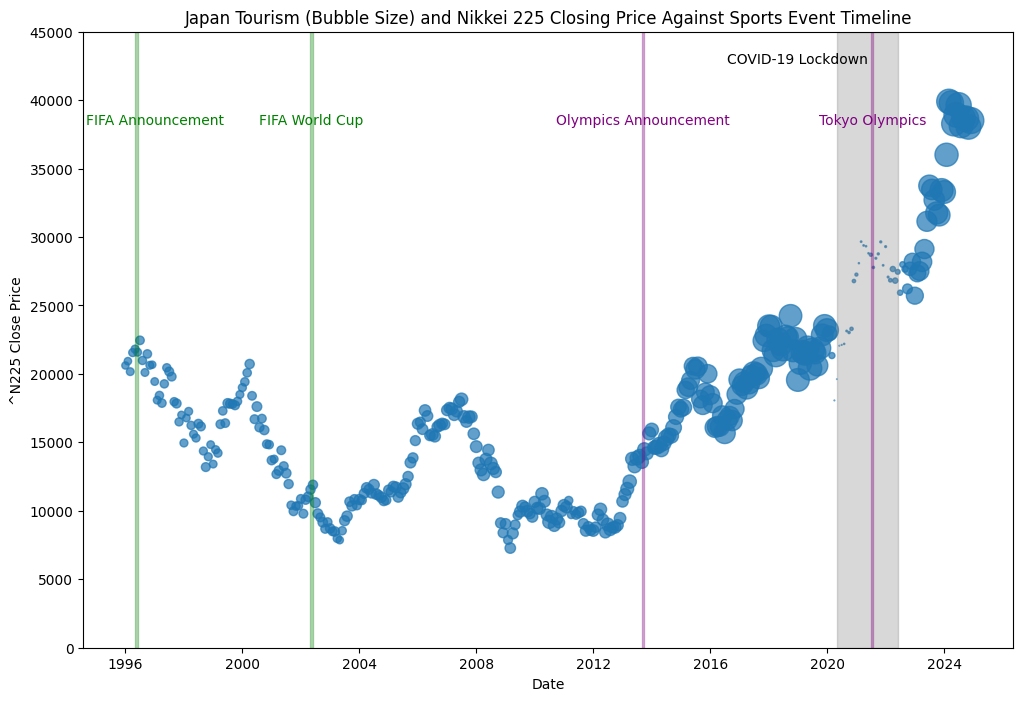

In [74]:
plt.figure(figsize=(12, 8))
plt.scatter(df_jp_tourism_stock['Date'], df_jp_tourism_stock['^N225'], s=df_jp_tourism_stock['Grand Total'] * 0.0001, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('^N225 Close Price')
plt.ylim(0, 45000)
plt.title('Japan Tourism (Bubble Size) and Nikkei 225 Closing Price Against Sports Event Timeline')
highlight_start3 = '2020-05-01'
highlight_end3 = '2022-06-01'
plt.axvspan(highlight_start3, highlight_end3, color='gray', alpha=0.3, label='COVID-19 Lockdown')
plt.text(pd.to_datetime('2019-01-01'), 42500, 'COVID-19 Lockdown', color='black', fontsize=10, ha='center', va='bottom')

# highlight olympics
highlight_start = '2021-07-01'
highlight_end = '2021-08-01'
plt.text(pd.to_datetime('2021-07-23'), 38000, 'Tokyo Olympics', color='purple', fontsize=10, ha='center', va='bottom')
plt.axvspan(highlight_start, highlight_end, color='purple', alpha=0.3, label='Tokyo Olympics')

#highlight Fifa
highlight_start1 = '2002-05-01'
highlight_end1 = '2002-06-01'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='FIFA World Cup')
plt.text(pd.to_datetime('2002-05-15'), 38000, 'FIFA World Cup', color='green', fontsize=10, ha='center', va='bottom')

# highlight fifa announcement
highlight_start2 = '1996-05-01'
highlight_end2 = '1996-06-01'
plt.axvspan(highlight_start2, highlight_end2, color='green', alpha=0.3, label='FIFA World Cup Announcement')
plt.text(pd.to_datetime('1997-01-01'), 38000, 'FIFA Announcement', color='green', fontsize=10, ha='center', va='bottom')

# highlight olympics announcement
highlight_start4 = '2013-09-01'
highlight_end4 = '2013-09-30'
plt.axvspan(highlight_start4, highlight_end4, color='purple', alpha=0.3, label='Olympics Announcement')
plt.text(pd.to_datetime('2013-09-15'), 38000, 'Olympics Announcement', color='purple', fontsize=10, ha='center', va='bottom')
#plt.legend()
plt.show()


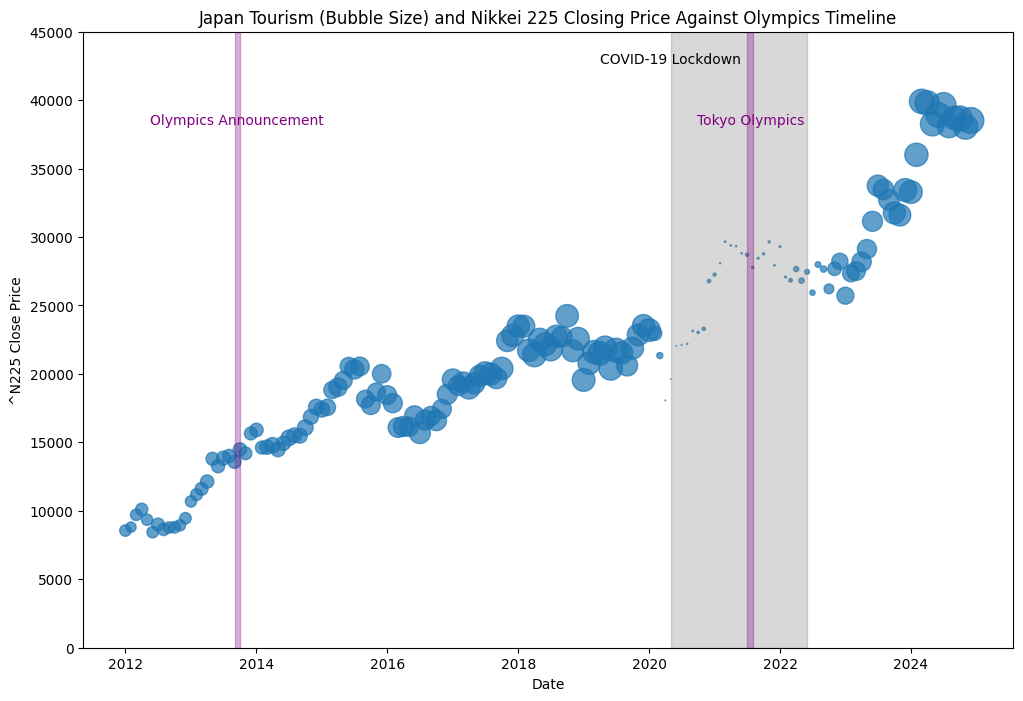

In [75]:
df_filtered = df_jp_tourism_stock[(df_jp_tourism_stock['Date'] >= '2012-01-01')]
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['Date'], df_filtered['^N225'], s=df_filtered['Grand Total'] * 0.0001, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('^N225 Close Price')
plt.ylim(0, 45000)
plt.title('Japan Tourism (Bubble Size) and Nikkei 225 Closing Price Against Olympics Timeline')

# highlight for covide
highlight_start3 = '2020-05-01'
highlight_end3 = '2022-06-01'
plt.axvspan(highlight_start3, highlight_end3, color='gray', alpha=0.3, label='COVID-19 Lockdown')
plt.text(pd.to_datetime('2020-05-01'), 42500, 'COVID-19 Lockdown', color='black', fontsize=10, ha='center', va='bottom')

#highlight for olympics
highlight_start = '2021-07-01'
highlight_end = '2021-08-01'
plt.axvspan(highlight_start, highlight_end, color='purple', alpha=0.3, label='Tokyo Olympics')
plt.text(pd.to_datetime('2021-07-23'), 38000, 'Tokyo Olympics', color='purple', fontsize=10, ha='center', va='bottom')

# highlight for Announcement
highlight_start4 = '2013-09-01'
highlight_end4 = '2013-09-30'
plt.axvspan(highlight_start4, highlight_end4, color='purple', alpha=0.3, label='Olympics Announcement')
plt.text(pd.to_datetime('2013-09-15'), 38000, 'Olympics Announcement', color='purple', fontsize=10, ha='center', va='bottom')
#plt.legend()
plt.show()



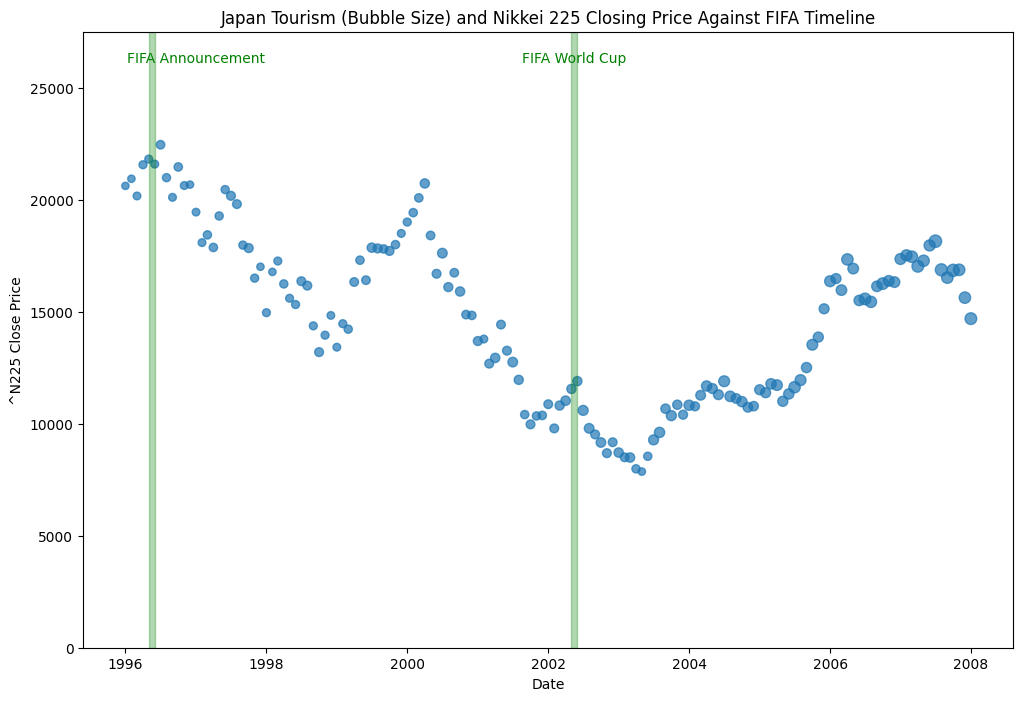

In [76]:
# Closer look by filtering on date
df_filtered = df_jp_tourism_stock[(df_jp_tourism_stock['Date'] >= '1996-01-01') & (df_jp_tourism_stock['Date'] <= '2008-01-01')]
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['Date'], df_filtered['^N225'], s=df_filtered['Grand Total'] * 0.0001, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('^N225 Close Price')
plt.ylim(0, 27500)
plt.title('Japan Tourism (Bubble Size) and Nikkei 225 Closing Price Against FIFA Timeline')

# highlight for Fifa
highlight_start1 = '2002-05-01'
highlight_end1 = '2002-06-01'
plt.axvspan(highlight_start1, highlight_end1, color='green', alpha=0.3, label='FIFA World Cup')
plt.text(pd.to_datetime('2002-05-15'), 26000, 'FIFA World Cup', color='green', fontsize=10, ha='center', va='bottom')

# highlight for announcement
highlight_start2 = '1996-05-01'
highlight_end2 = '1996-06-01'
plt.axvspan(highlight_start2, highlight_end2, color='green', alpha=0.3, label='FIFA World Cup Announcement')

plt.text(pd.to_datetime('1997-01-01'), 26000, 'FIFA Announcement', color='green', fontsize=10, ha='center', va='bottom')
#plt.legend()
plt.show()
